# **Weapons Detection - Computer Vision Project**
<div style="text-align: justify;"> 

## **Introduction**

In this project, we developed a **Weapons Detection System** using computer vision techniques to identify and classify weapons in images or videos. The system utilizes **Ultralytics YOLOv11n** (You Only Look Once) nano model to detect various types of weapons efficiently in real-time. YOLOvn is a state-of-the-art, deep learning-based object detection model that is known for its speed and accuracy, making it a powerful tool for real-time applications such as security surveillance, crowd monitoring, and law enforcement.

## **Problem Statement**

The rise in security concerns, especially in crowded places like airports, shopping malls, and public gatherings, has led to an increased need for automated surveillance systems that can detect dangerous objects such as weapons. Detecting weapons in real-time can significantly improve the safety of individuals and prevent violent incidents. This project focuses on building a **Weapons Detection System** using the **YOLOv11n** nano model, an advanced computer vision model designed for real-time object detection. In public spaces, it is essential to identify potential threats such as firearms or knives to prevent criminal activities or violent incidents. While manual security checks or traditional metal detectors are effective, they are time-consuming and impractical for continuous, large-scale monitoring. Thus, an automated system using computer vision is needed to enhance surveillance, alert authorities in case of threats, and reduce human error.


## **Objective**
The main objective of this project is to leverage the power of **YOLOv11n** to detect weapons (such as guns) in various environments. The ability to detect weapons quickly and reliably is crucial for improving safety and security in public spaces, private properties, and restricted areas.

## **Why YOLOv11n?**
[Ultralytics](https://www.ultralytics.com/) [YOLO11](https://github.com/ultralytics/ultralytics) is a cutting-edge, state-of-the-art (SOTA) model that builds upon the success of previous YOLO versions and introduces new features and improvements to further boost performance and flexibility. YOLO11 is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and tracking, instance segmentation, image classification and pose estimation tasks.

### **YOLOv11n Model Performance Table**

The following table presents the performance metrics for the **YOLOv11n (nano)** model, including various parameters such as model size, mAP (mean Average Precision), inference speed on CPU and T4 TensorRT, the number of parameters, and FLOPs (floating-point operations).


| **Model**  | **Size (pixels)** | **mAP@50-95** | **Speed (CPU ONNX)** (ms) | **Speed (T4 TensorRT 10)** (ms) | **Params (M)** | **FLOPs (B)** |
|:------------:|:-------------------:|:---------------:|:----------------------------:|:---------------------------------:|:----------------:|:---------------:|
| **YOLOv11n** |       640               | 39.5          | 56.1 ± 0.8                | 1.5 ± 0.0                       | 2.6            | 6.5           |



* **Model:** The name of the YOLO model variant (in this case, YOLOv11n).
* **Size (pixels):** The input image size (640x640 in this case).
* **mAP@50-95:** The mean Average Precision (mAP) at IoU thresholds from 0.5 to 0.95. This metric evaluates the accuracy of the model.
* **Spped (CPU ONNX):** Inference time (in milliseconds) on a CPU using the ONNX format.
* **Speed (T4 TensorRT 10):** Inference time in (in milliseconds) on a Tesla T4 GPU using TensorRT 10 acceleration.
* **Params (M):** The number of parameters in the model, measured in millions.
* **FLOPs (B):** The number of floating-point operations (in billions) required to process a single image.

## **Significance**
- **Public Safety**: The system can help prevent potential violent incidents and enhance security by detecting weapons early.
- **Cost-Effective Surveillance**: An automated detection reduces the need for manual inspections, providing more efficient use of resources.
- **Real-Time Alerts**: A fast and reliable system can notify security personnel immediately, reducing response time during emergencies.

## **Installing Required Libraries**
<div style="text-align: justify;"> 

To run the weapons detection model using YOLOv11n and other necessary functionalities, we first need to install the required Python libraries. The following lines of code are used to install the **Ultralytics YOLOv11n** library and the **Roboflow** library, which will help in dataset management and model training.

### **1. Install Ultralytics YOLOv11n**

```python
!pip install ultralytics -q
!pip install roboflow -q
```

### **Explanation:**
<div style="text-align: justify;"> 

1. **Ultralytics YOLOv11n**: This library provides tools for working with YOLOv11 models, including pretrained weights and utilities for training, fine-tuning, and inference. YOLOv11 is highly efficient for real-time object detection tasks.

2. **Roboflow**: Roboflow offers a platform and API for easy dataset management, annotation, and processing. It provides a convenient interface to handle datasets and formats them into a structure ready for training with models like YOLOv11.

In [1]:
!pip install ultralytics -q
!pip install roboflow -q

## **Importing Required Libraries and Loading YOLOv11n Model**
<div style="text-align: justify;"> 

In this section, we import the necessary libraries and load the pre-trained YOLOv11n model to begin the object detection process. Below is an explanation of each line of code.

### 1. **Importing Libraries**

```python
import os
import glob
import shutil
import warnings
warnings.filterwarnings('ignore')
import ultralytics
from IPython.display import display, Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import torch
from ultralytics import YOLO
model = YOLO('yolo11n')
from kaggle_secrets import UserSecretsClient
from roboflow import Roboflow
```

### **Explanation**
<div style="text-align: justify;"> 

- **Standard Libraries**: Used for system interaction and file manipulation.
- **Machine Learning Libraries**: Key tools for training and applying machine learning models.
- **Image Processing and Visualization**: Libraries for handling images and generating visual outputs.
- **Model Loading**: Specifically, YOLOv11n is loaded for object detection tasks.
- **Secrets Management**: For securely handling sensitive information (like Kaggle API keys or other credentials).
- **Dataset Handling**: Roboflow simplifies working with annotated datasets for object detection. 


In [ ]:
import os
import glob
import shutil
import warnings
warnings.filterwarnings('ignore')
import ultralytics
from IPython.display import display, Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import torch
from ultralytics import YOLO
model = YOLO('yolo11n')
from kaggle_secrets import UserSecretsClient
from roboflow import Roboflow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 83.3MB/s]


## **Accessing and Using Roboflow for Dataset Management**
<div style="text-align: justify;"> 

In this section of the code, we access the **Roboflow** platform to load a specific dataset for the weapons detection task. The dataset will be used to train or fine-tune the **YOLOv11n** model for detecting weapons. The following steps outline how the code interacts with the Roboflow API to fetch the dataset.

### 1. **Retrieve the Roboflow API Key**

```python
ROBOFLOW_API_KEY = UserSecretsClient().get_secret("ROBOFLOW_API_KEY")
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("mike-ovbzu").project("weapons_detection-tsdac")
version = project.version(9)
dataset = version.download("yolov11")
```


### **Explanation**
<div style="text-align: justify;"> 

- **Accessing the API Key**: We use Kaggle's secret management to securely retrieve the API key for Roboflow.
- **Interacting with Roboflow**: The code initializes the Roboflow API client and accesses a specific project and version of the dataset related to weapons detection.
- **Downloading the Dataset**: The dataset is downloaded in a format that can be directly used with the YOLOv11n model for object detection tasks.

In [ ]:
ROBOFLOW_API_KEY = UserSecretsClient().get_secret("ROBOFLOW_API_KEY")
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("mike-ovbzu").project("weapons_detection-tsdac")
version = project.version(9)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to weapons_detection-9 in yolov11:: 100%|██████████| 10938/10938 [00:01<00:00, 9175.98it/s] 


## **Checking GPU Availability for Model Training**
<div style="text-align: justify;"> 

In deep learning tasks, leveraging GPU resources can significantly speed up model training and inference. The following lines of code check if a GPU is available for use with PyTorch.

### 1. **Check if CUDA-enabled GPU is Available**

```python
gpu_avail = torch.cuda.is_available()
print(gpu_avail)
```


### **Explanation**
<div style="text-align: justify;"> 

- **Checking GPU Availability**: The function `torch.cuda.is_available()` is used to verify whether a GPU (with CUDA support) is present on the machine.
- **Printing the Result**: The availability status is printed to the console so that the user is informed whether a GPU is available for use in model training or inference.

In [ ]:
gpu_avail = torch.cuda.is_available()
print(gpu_avail)

True


## **Checking GPU Information with `nvidia-smi`**
<div style="text-align: justify;"> 

The `nvidia-smi` command is a tool provided by NVIDIA that allows users to interact with and monitor the status of NVIDIA GPUs on their system. It provides detailed information about the GPU hardware, including memory usage, temperature, and running processes.

### 1. **Running the `nvidia-smi` Command**

```bash
!nvidia-smi
```

### **Explanation**
<div style="text-align: justify;"> 

- **Running the Command**: The `nvidia-smi` command is used to interact with and monitor the status of NVIDIA GPUs, typically for machine learning or computational tasks.
- **Details Provided**: It outputs key GPU statistics, such as utilization, memory usage, temperature, and active processes, which help in managing and troubleshooting GPU-related issues.
- **Why Use It**: It's crucial for checking whether your GPU is functioning optimally, especially when running resource-intensive tasks like training deep learning models.

In [5]:
!nvidia-smi

Sun Dec  1 12:50:24 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P0             27W /  250W |       3MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## **Checking System Compatibility with `ultralytics.checks()`**
<div style="text-align: justify;"> 

The `ultralytics.checks()` function is a utility provided by the **Ultralytics** library to verify the system's setup and ensure that all dependencies are correctly installed and compatible for running Ultralytics models, such as YOLOv11n.

### 1. **Running the `ultralytics.checks()` Function**

```python
ultralytics.checks()
```


### **Explanation**
<div style="text-align: justify;"> 

- **Function Purpose**: The `ultralytics.checks()` function checks the environment to ensure that all necessary dependencies and system configurations are correct for running Ultralytics models.
- **Output Details**: It provides feedback on issues like missing dependencies or incorrect configurations, helping the user quickly diagnose problems.
- **Why Use It**: It's a useful tool for ensuring that the system is fully prepared for deep learning tasks, particularly those involving YOLOv11n or other models from the Ultralytics library.

In [ ]:
ultralytics.checks()

Ultralytics 8.3.39 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)


## **Clearing the GPU Memory Cache with `torch.cuda.empty_cache()`**
<div style="text-align: justify;"> 

When working with deep learning models, especially when training large models or processing large datasets, managing GPU memory becomes crucial. The `torch.cuda.empty_cache()` function is used to release unused memory from the GPU to optimize memory usage.

### 1. **Calling `torch.cuda.empty_cache()`**

```python
torch.cuda.empty_cache()
```
### **Explanation**
<div style="text-align: justify;"> 

- **Memory Management**: `torch.cuda.empty_cache()` helps free GPU memory that is no longer being used but has not yet been released by PyTorch, which is essential for preventing out-of-memory errors during model training or inference.
- **Use Cases**: It is particularly useful when working with large models, datasets, or performing tasks that require frequent memory clearing to avoid fragmentation.
- **Limitations**: It only clears unused memory and does not directly deallocate tensors, so it does not replace the need for careful memory management when working with large neural networks.

In [7]:
torch.cuda.empty_cache()

## **Training YOLOv11n Model: Two Approaches**
<div style="text-align: justify;"> 

In this section, we will explain two different ways of training the **YOLOv11n** model: one for running in a Kaggle notebook or Google Colab, and the other for running in local environments such as VS Code or Jupyter Notebook. Both approaches are designed to train the model on a custom object detection dataset.

### 1. **Training in Kaggle or Google Colab**

```bash
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=300 imgsz=640
```

<div style="text-align: justify;"> 

### 2. **Training in VS Code or Jupyter Notebook**
<div style="text-align: justify;"> 

```python
results = model.train(
    data='/kaggle/input/dataset/data.yaml',  # Path to the dataset configuration file
    epochs=50,         # Number of training epochs
    imgsz=640,         # Image size for training
    batch=16,          # Batch size
    workers=4          # Number of data loading workers
)
```

### **Key Differences**
| **Aspect**                   | **Kaggle/Colab**                                              | **VS Code/Jupyter**                                             |
|:------------------------------:|:---------------------------------------------------------------:|:----------------------------------------------------------------:|
| **Method of Execution**      | Command-line (`!yolo task=detect mode=train`)                 | Function call (`model.train()`)                                 |
| **Environment**               | Kaggle or Google Colab                                       | Local (VS Code, Jupyter)                                       |
| **Configuration File Path**  | `{dataset.location}/data.yaml` (dynamic path in Colab)       | Fixed path like `/kaggle/input/dataset/data.yaml`               |
| **Batch Size**                | Default batch size (if not specified)                        | Custom batch size (e.g., `batch=16`)                           |
| **Epochs**                    | Can specify a high number of epochs (e.g., 300)              | Often fewer epochs (e.g., 50) due to limited resources         |
| **Image Size**                | Image size defined as `imgsz=640`                             | Image size defined as `imgsz=640`                               |




### **Explanation**
<div style="text-align: justify;"> 

- **Kaggle/Colab Approach**: A command-line approach is used to run the training job. This is common in cloud environments where you execute shell commands directly within notebooks.
- **VS Code/Jupyter Approach**: Here, the `.train()` method is called on the YOLOv11n model object, offering a more Pythonic approach that allows more flexibility and is ideal for local development.

In [26]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=300 imgsz=640

Ultralytics 8.3.39 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/working/weapons_detection-9/data.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True,

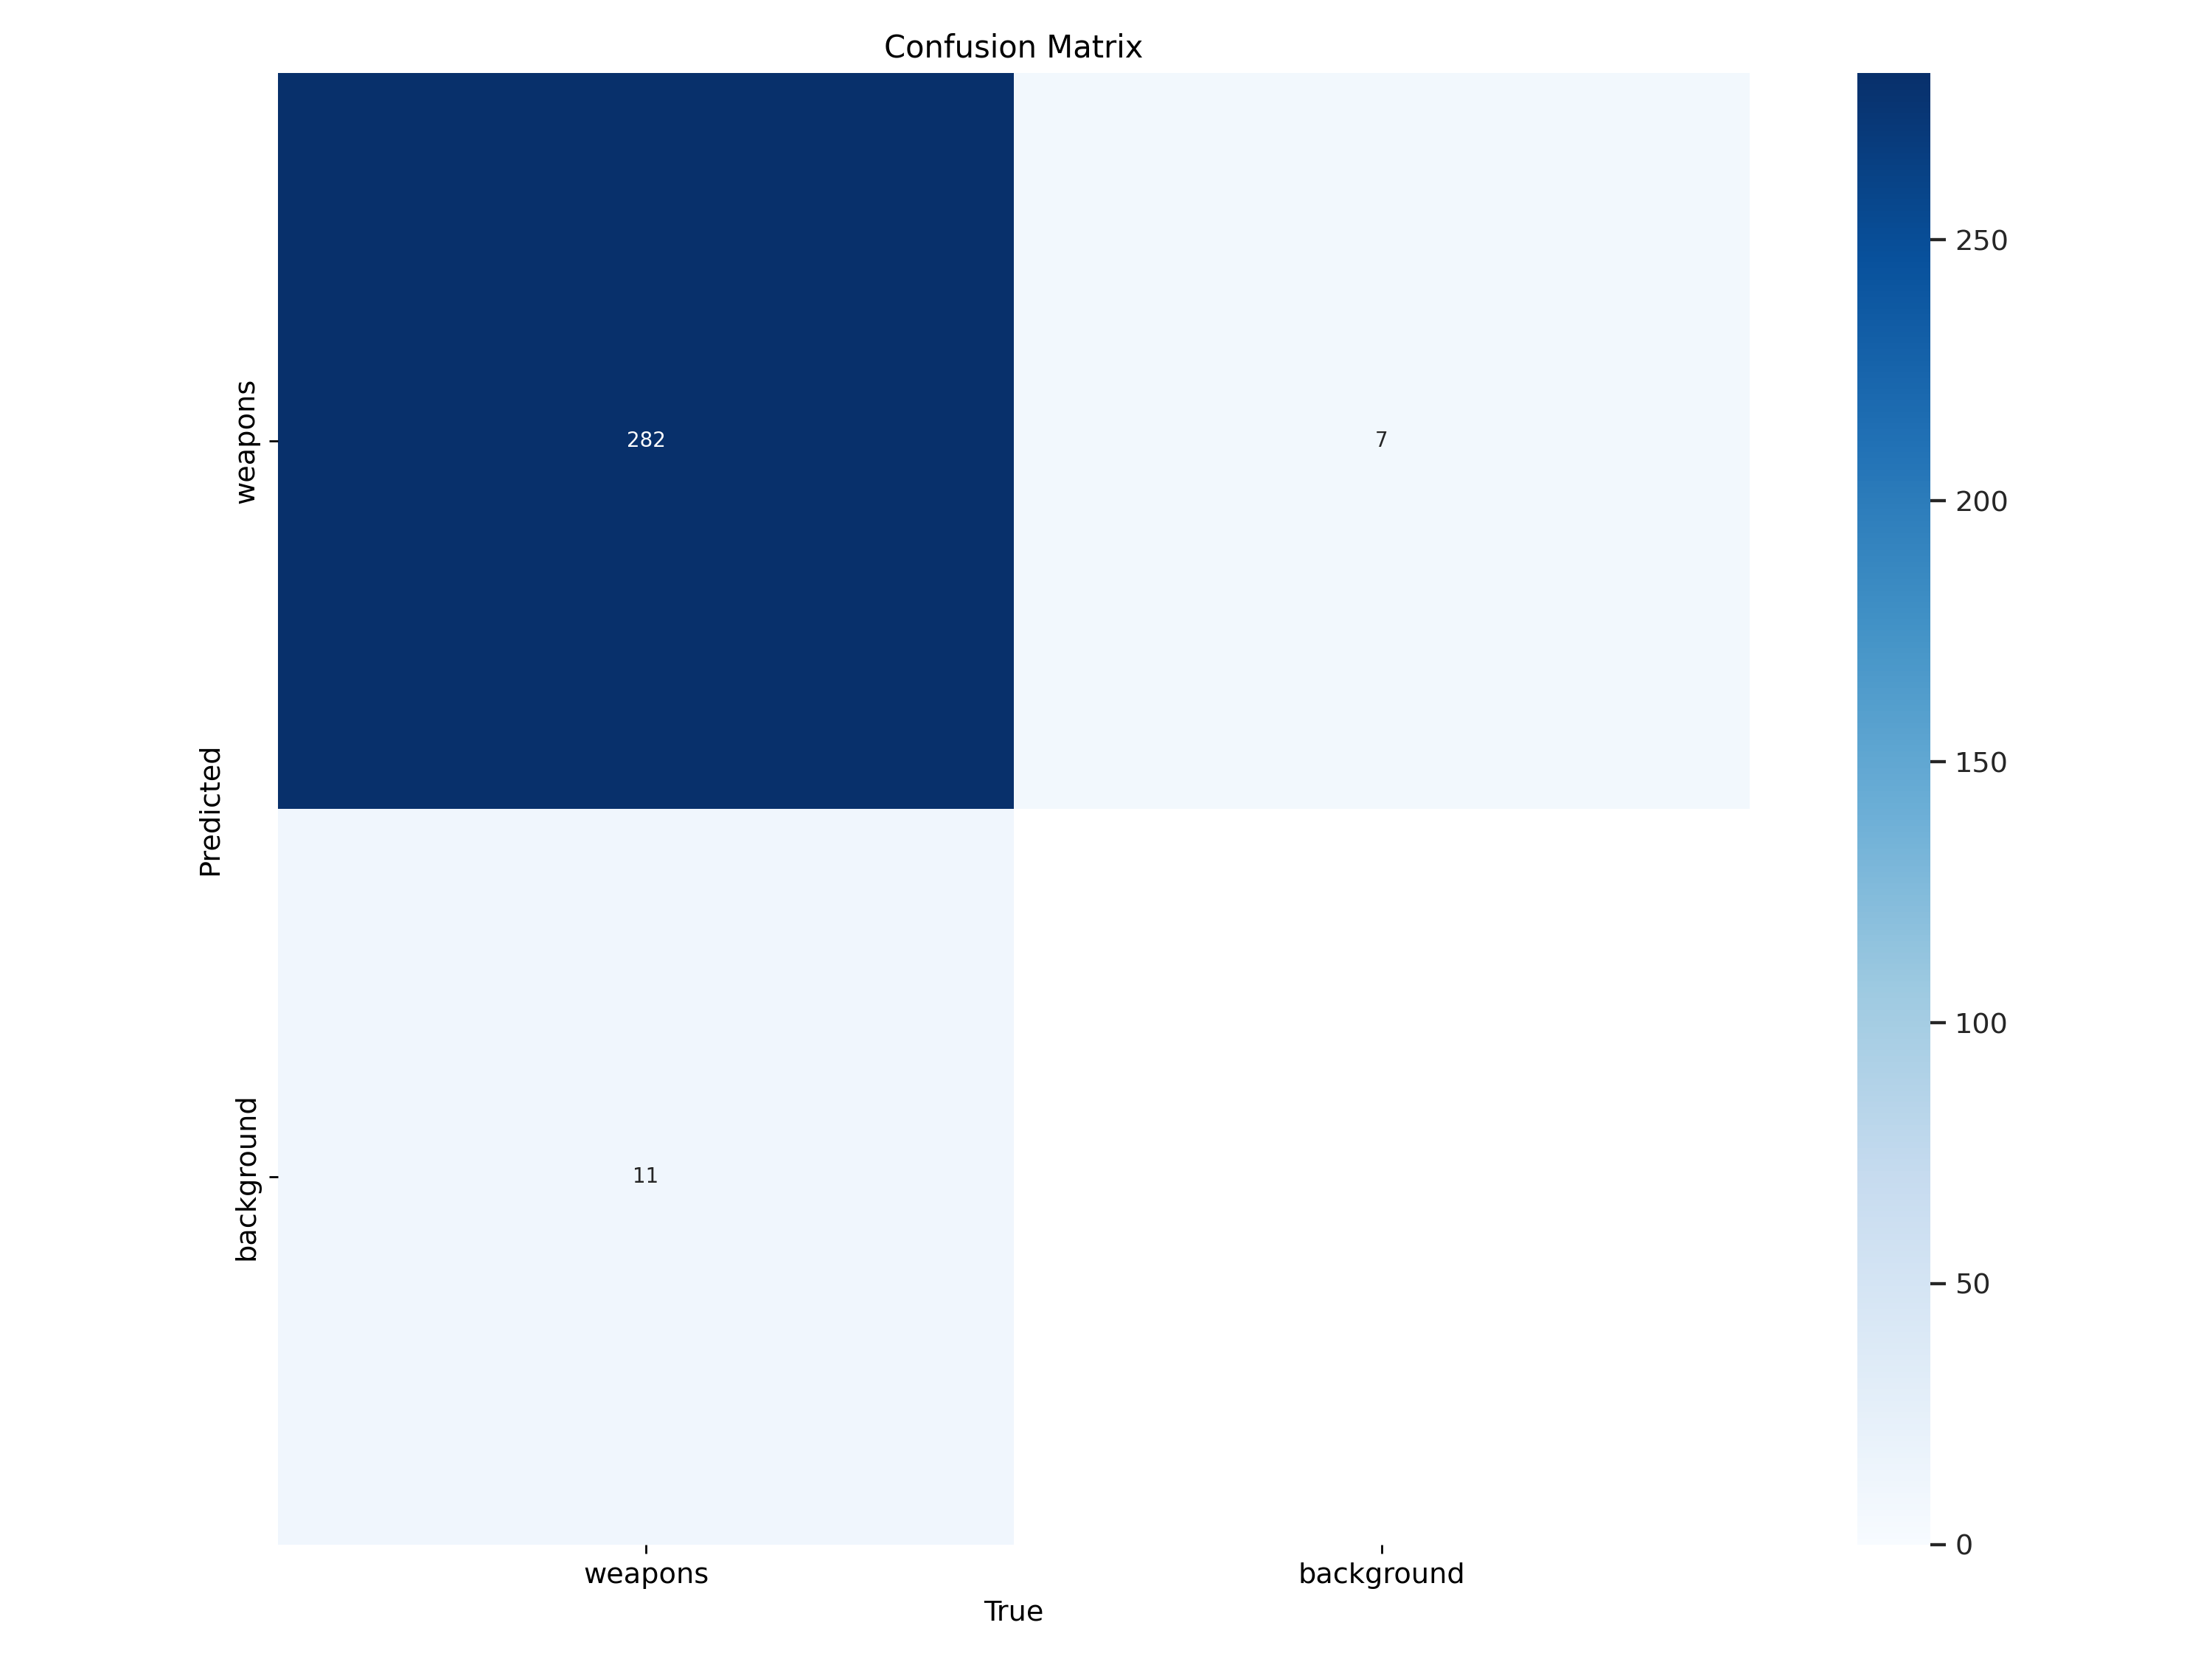

In [29]:
Image("/kaggle/working/runs/detect/train2/confusion_matrix.png", width=1000)

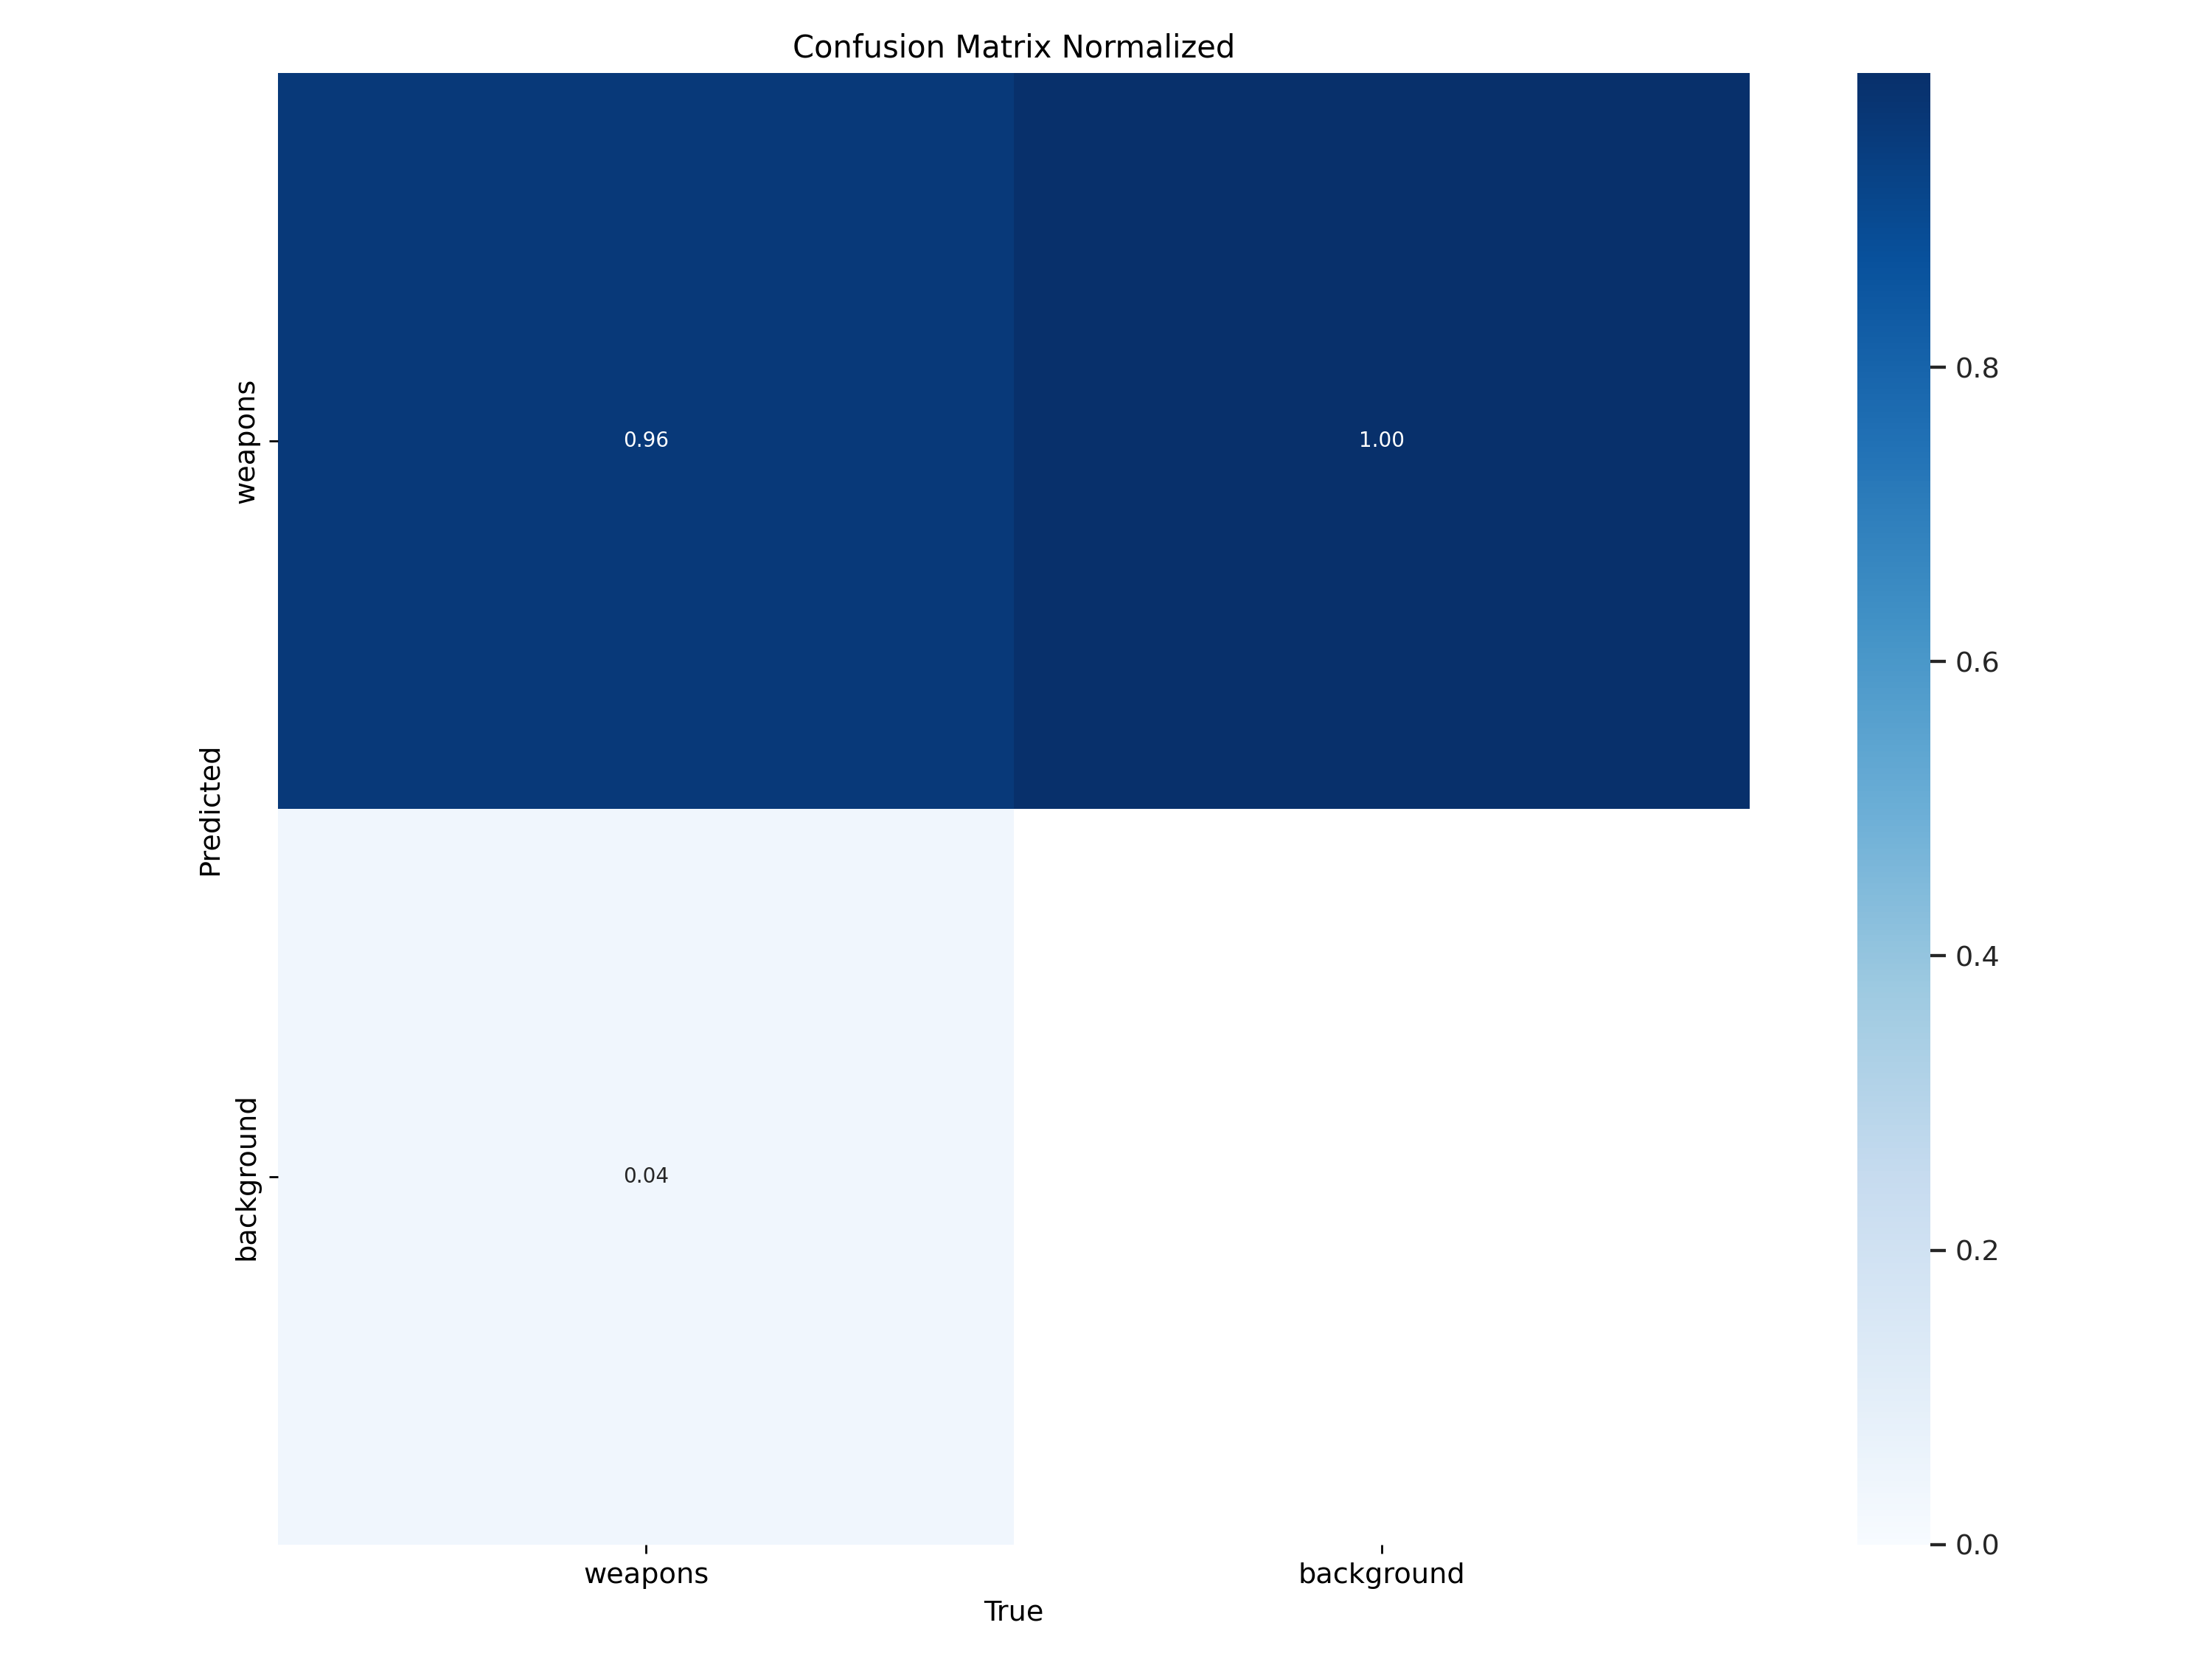

In [30]:
Image("/kaggle/working/runs/detect/train2/confusion_matrix_normalized.png", width=1000)

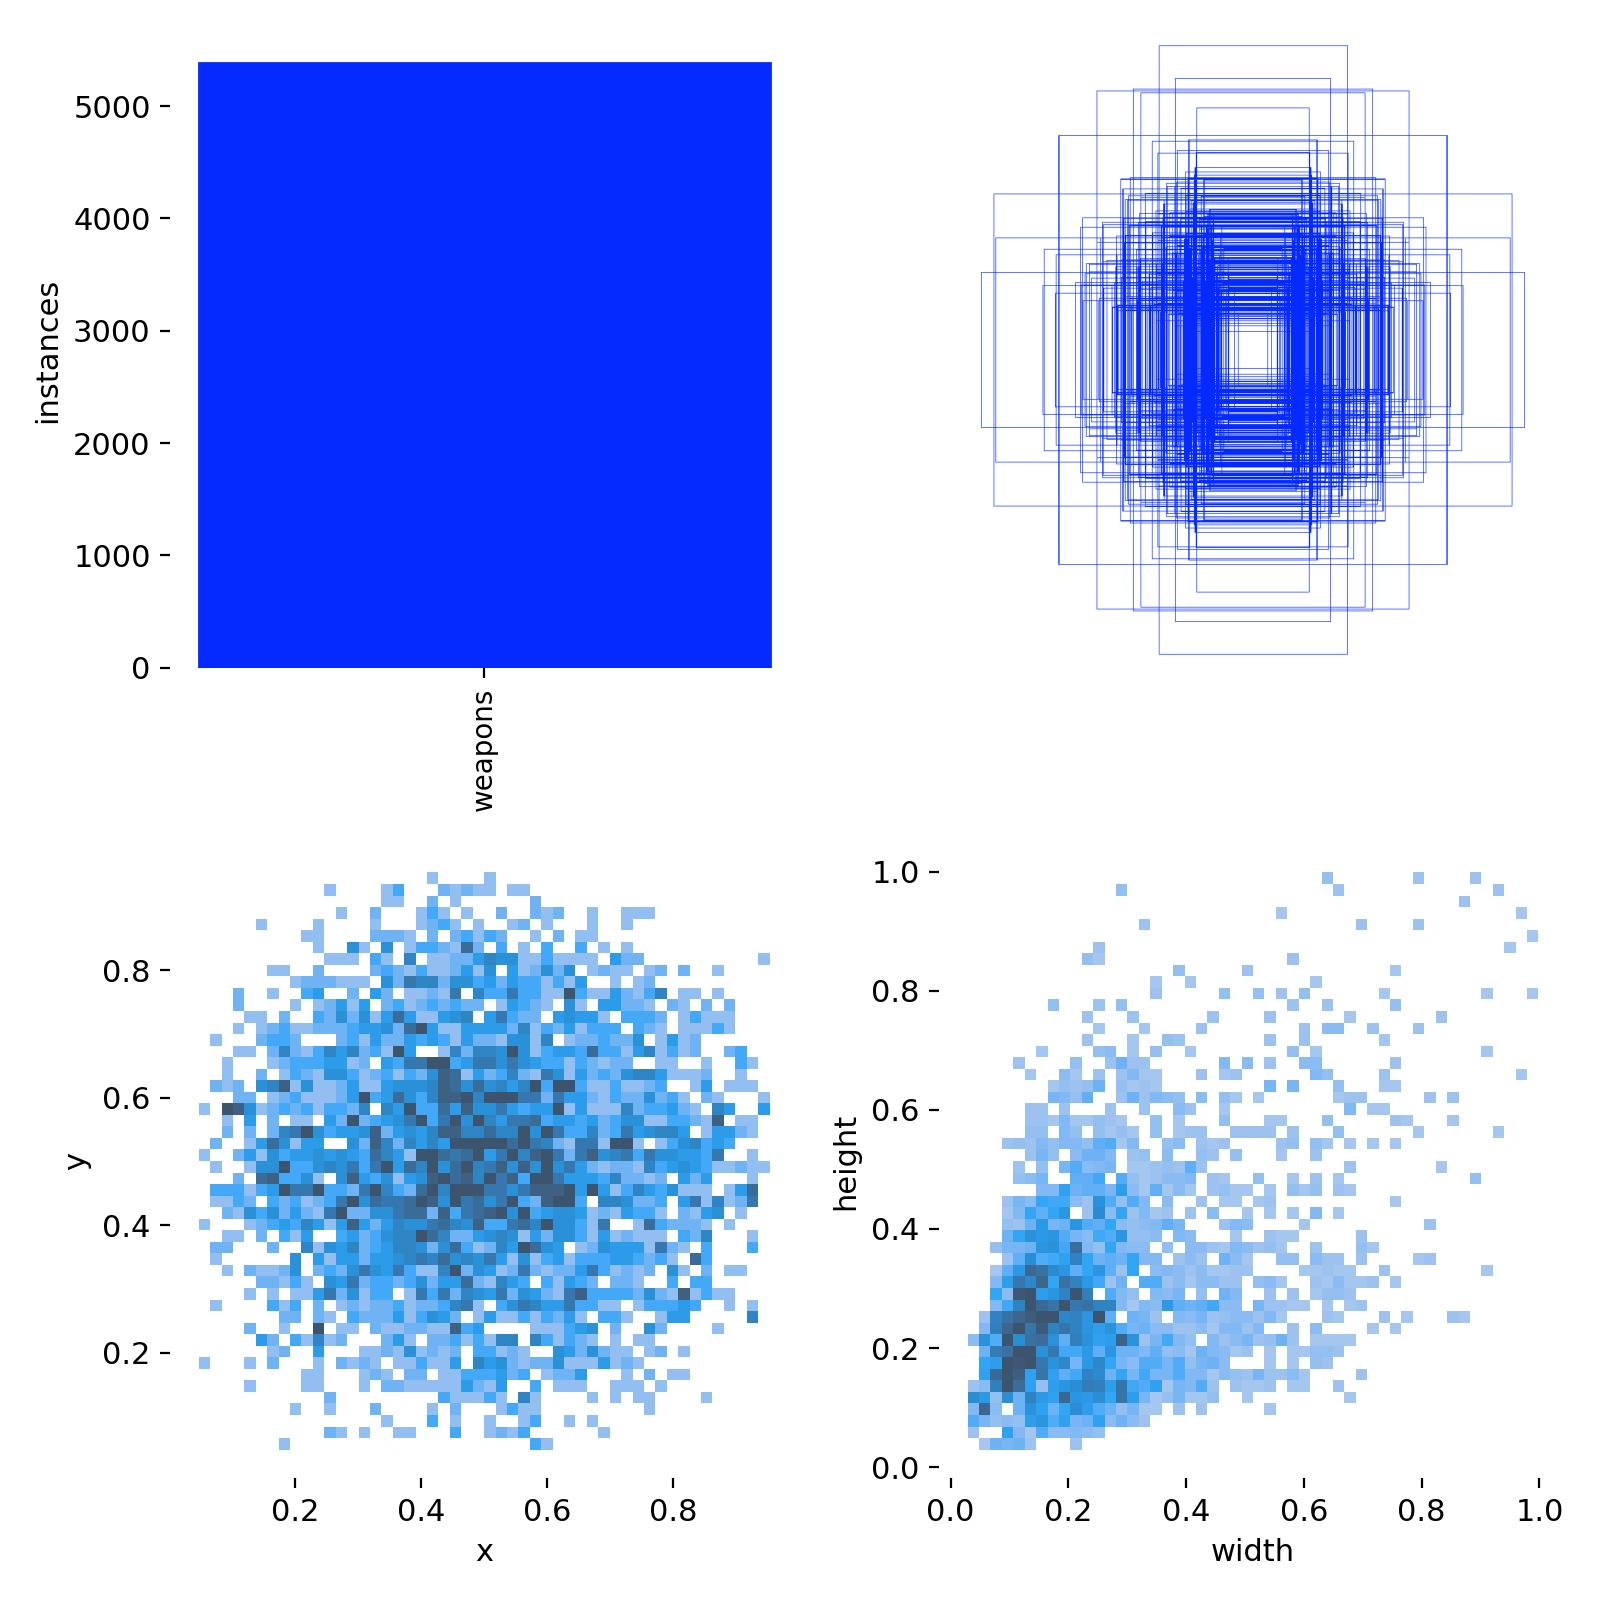

In [31]:
Image("/kaggle/working/runs/detect/train2/labels.jpg", width=600)

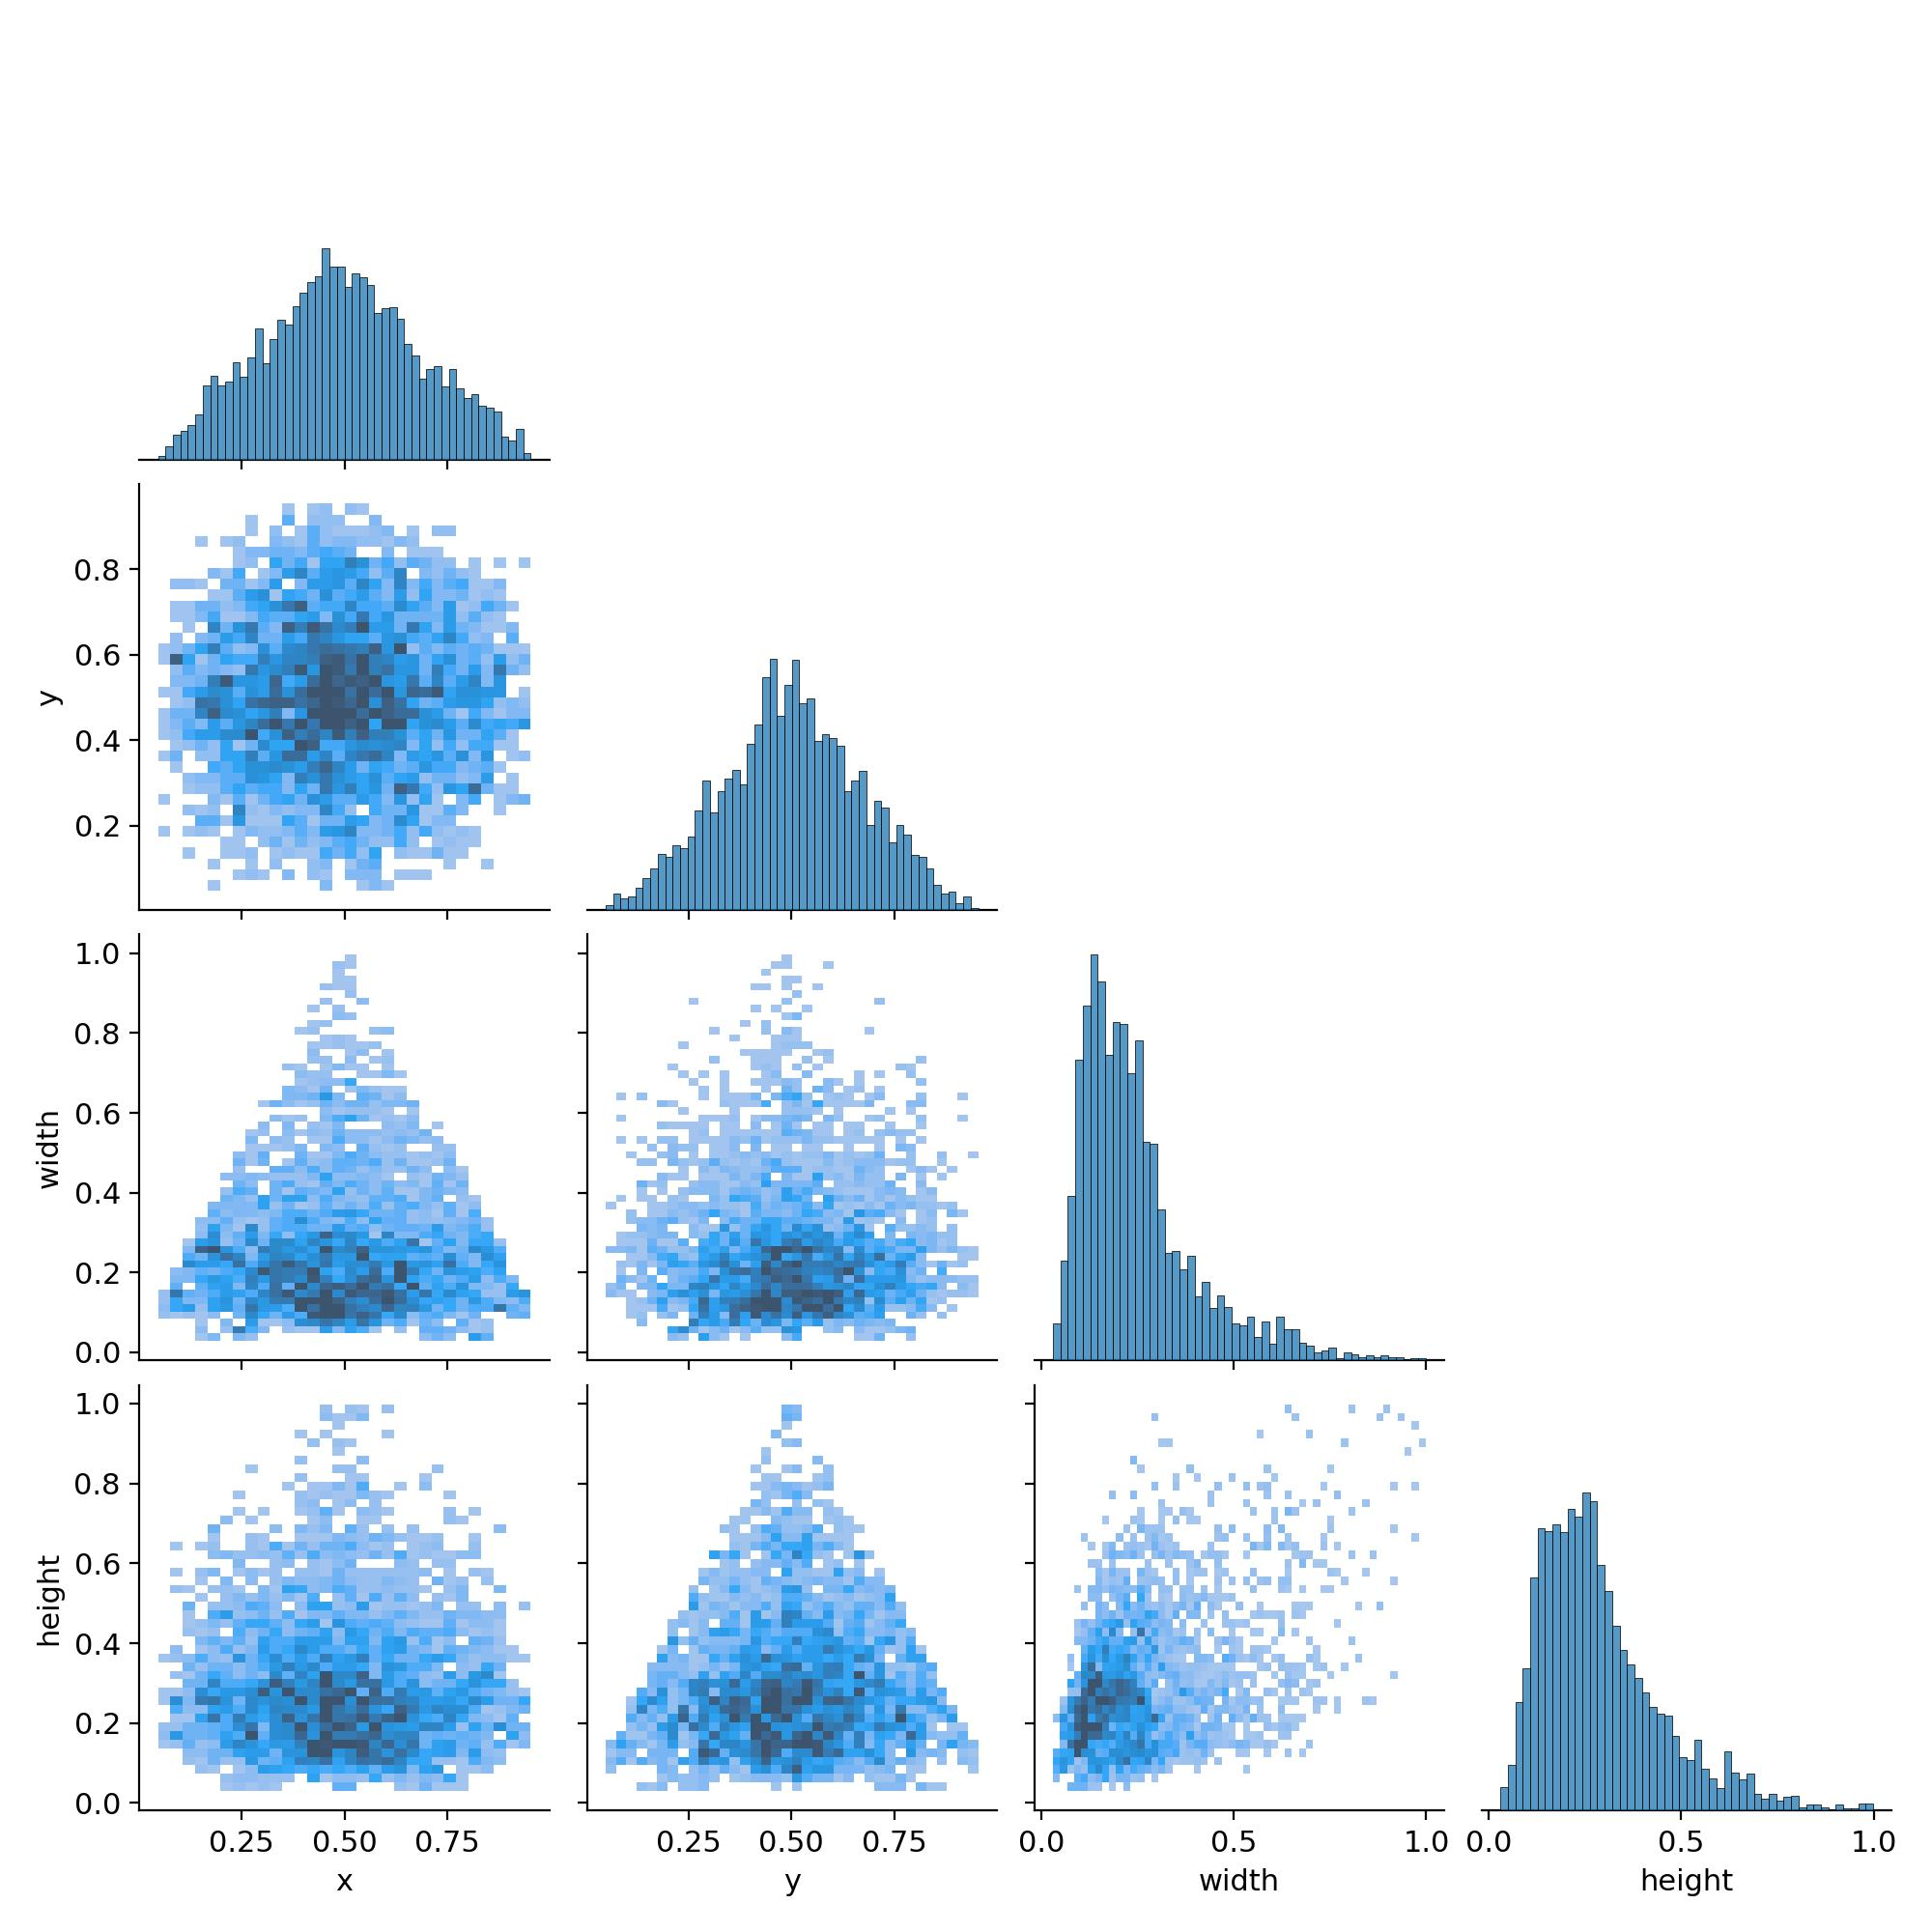

In [32]:
Image("/kaggle/working/runs/detect/train2/labels_correlogram.jpg", width=800)

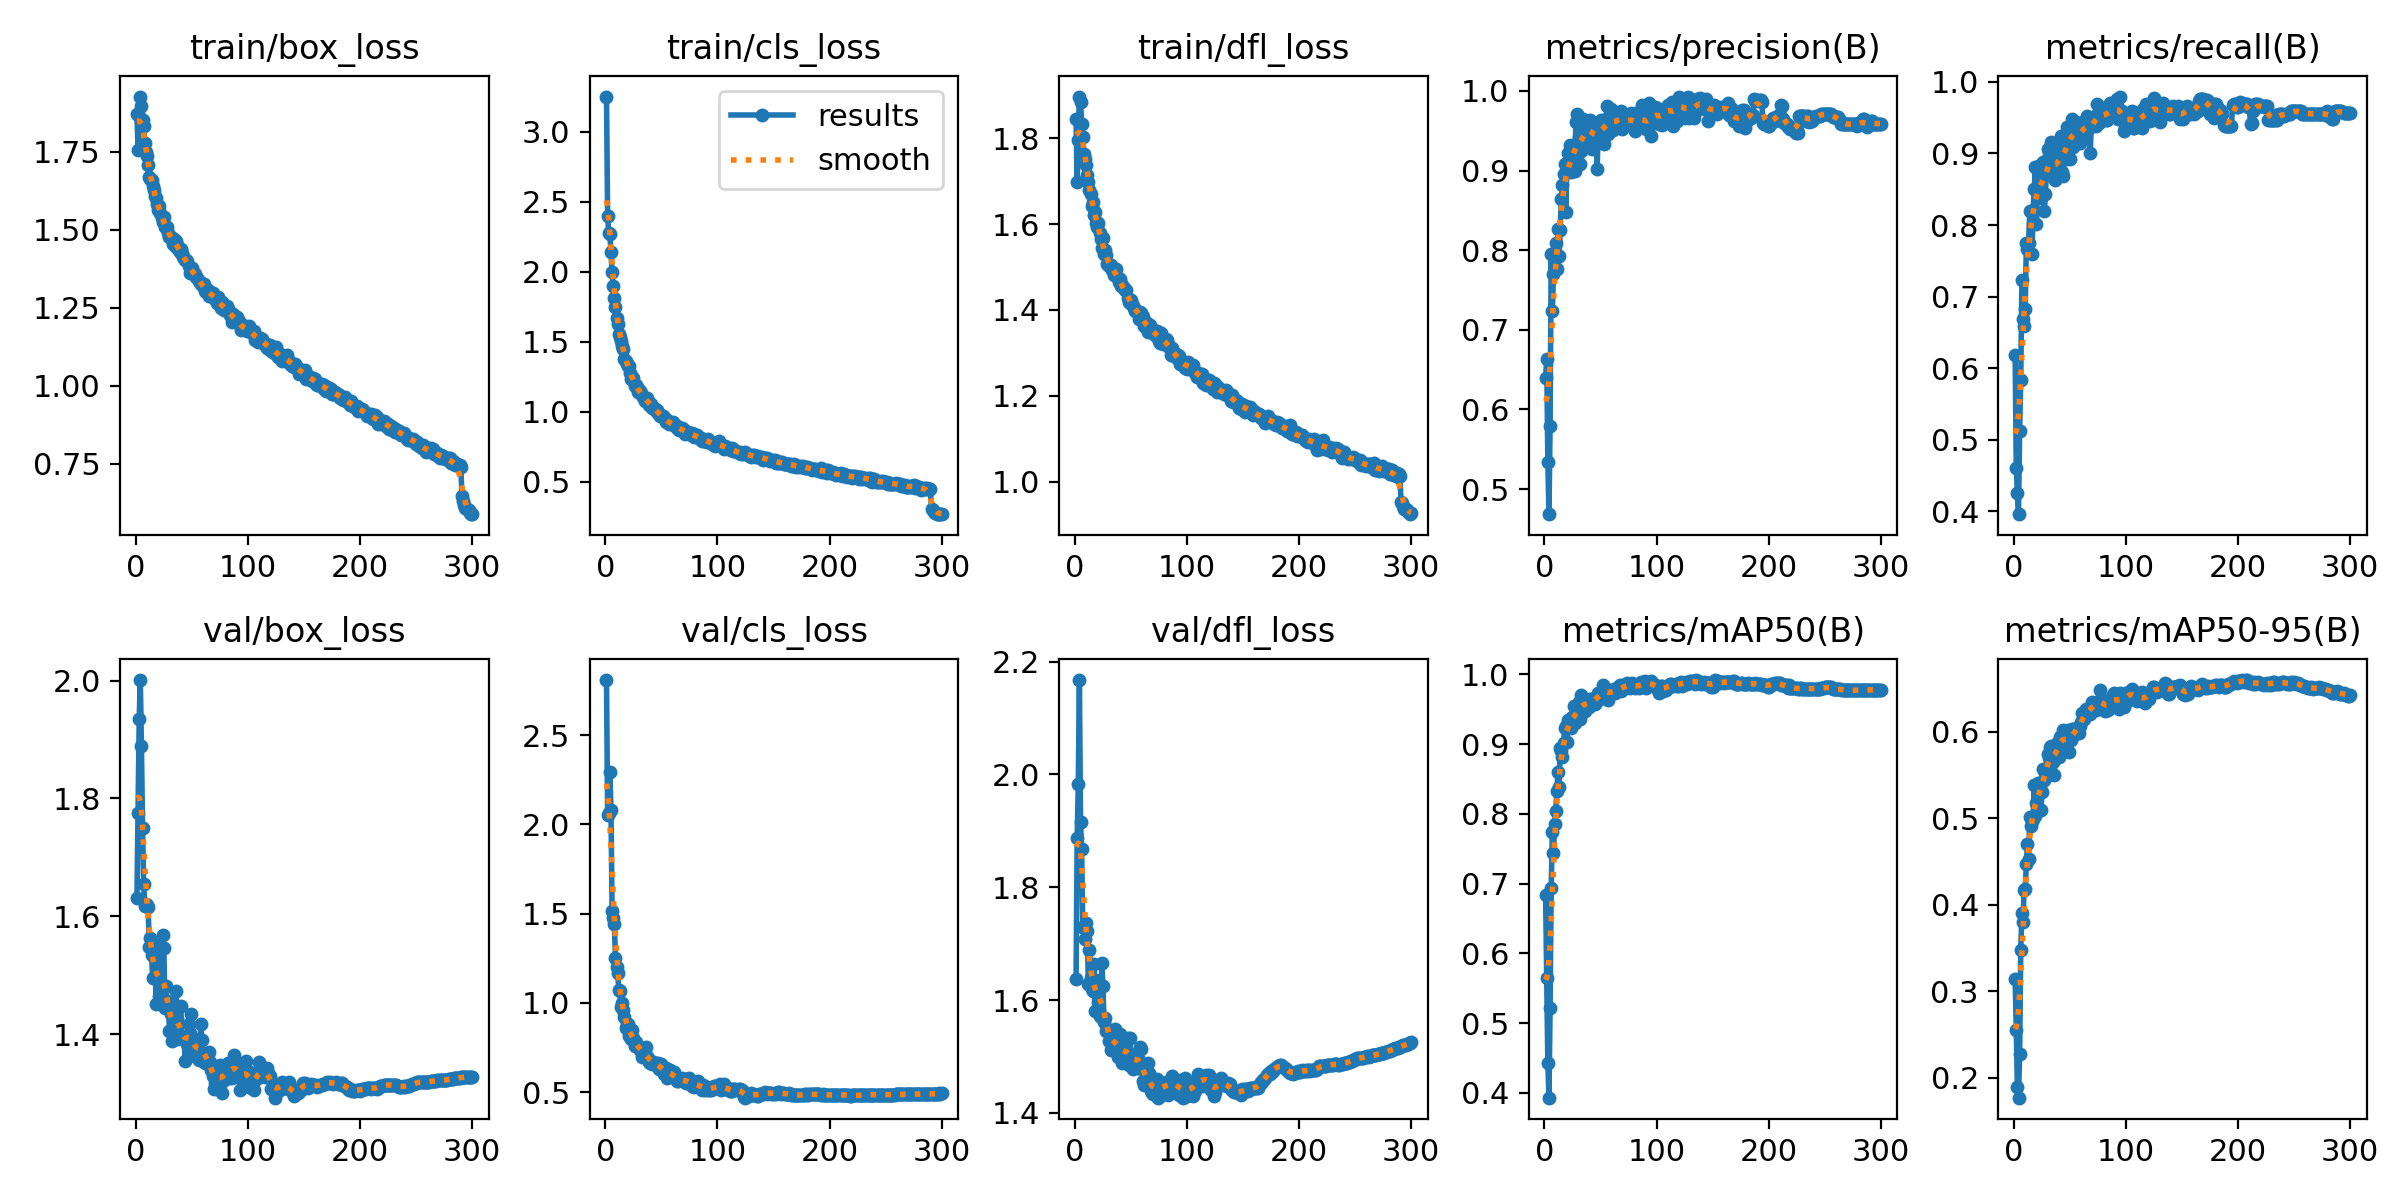

In [33]:
Image("/kaggle/working/runs/detect/train2/results.png", width=1000)

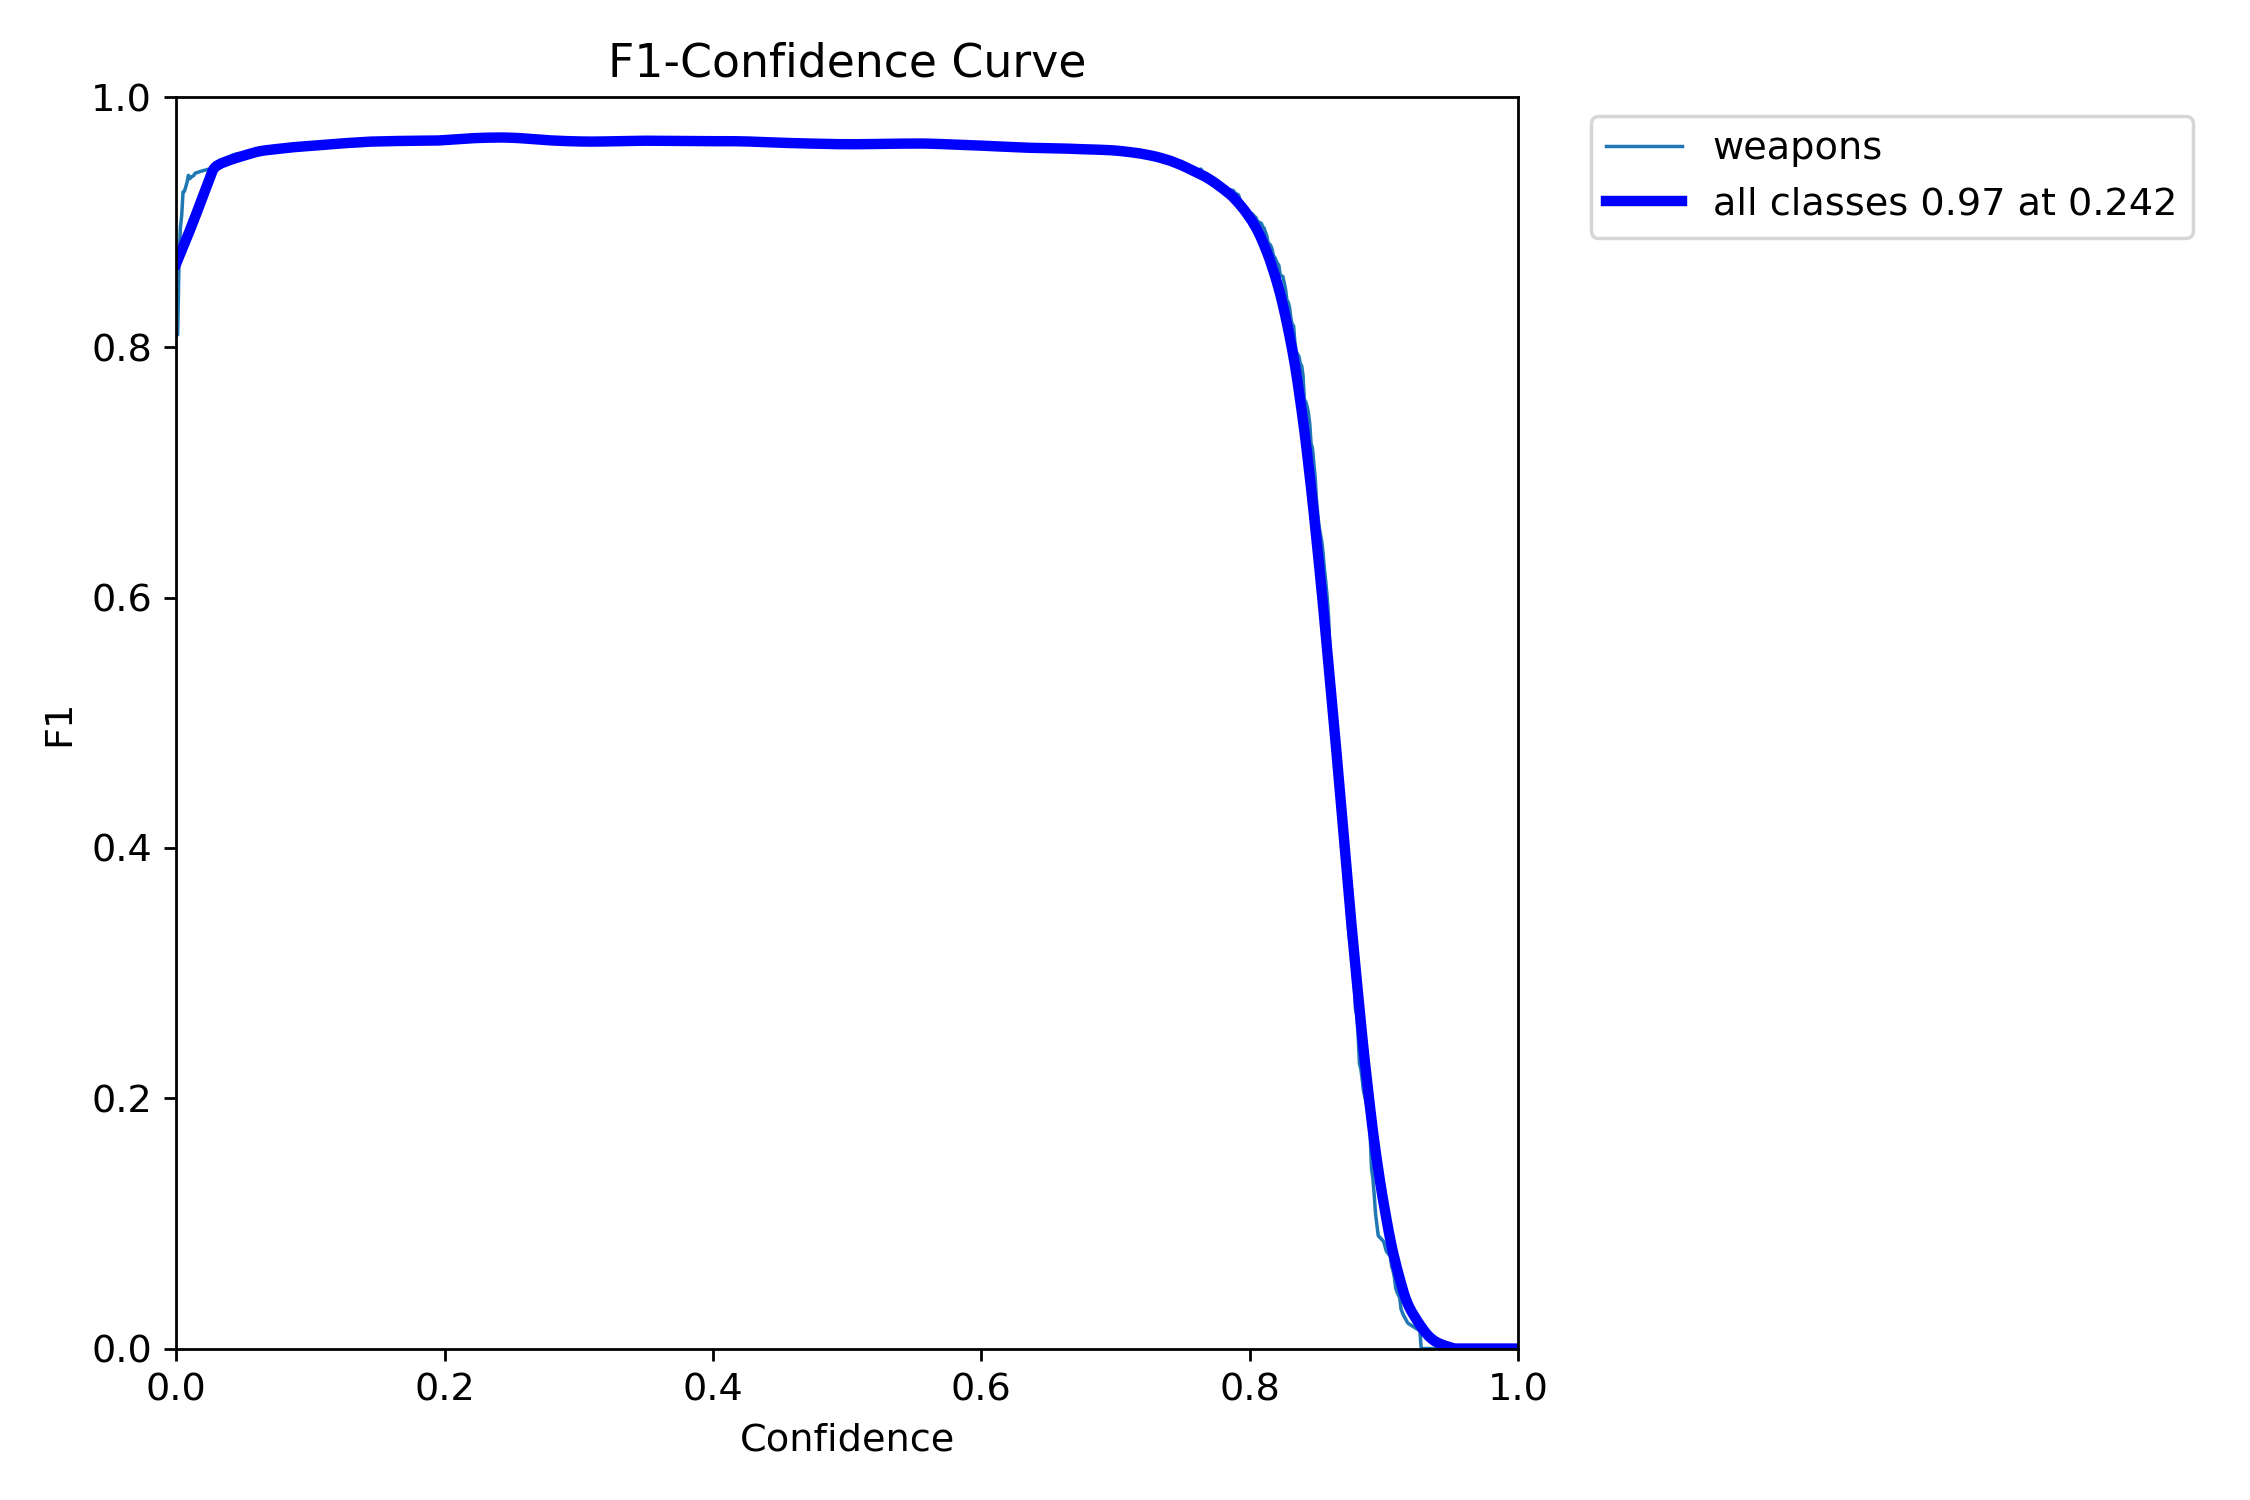

In [34]:
Image("/kaggle/working/runs/detect/train2/F1_curve.png", width=800)

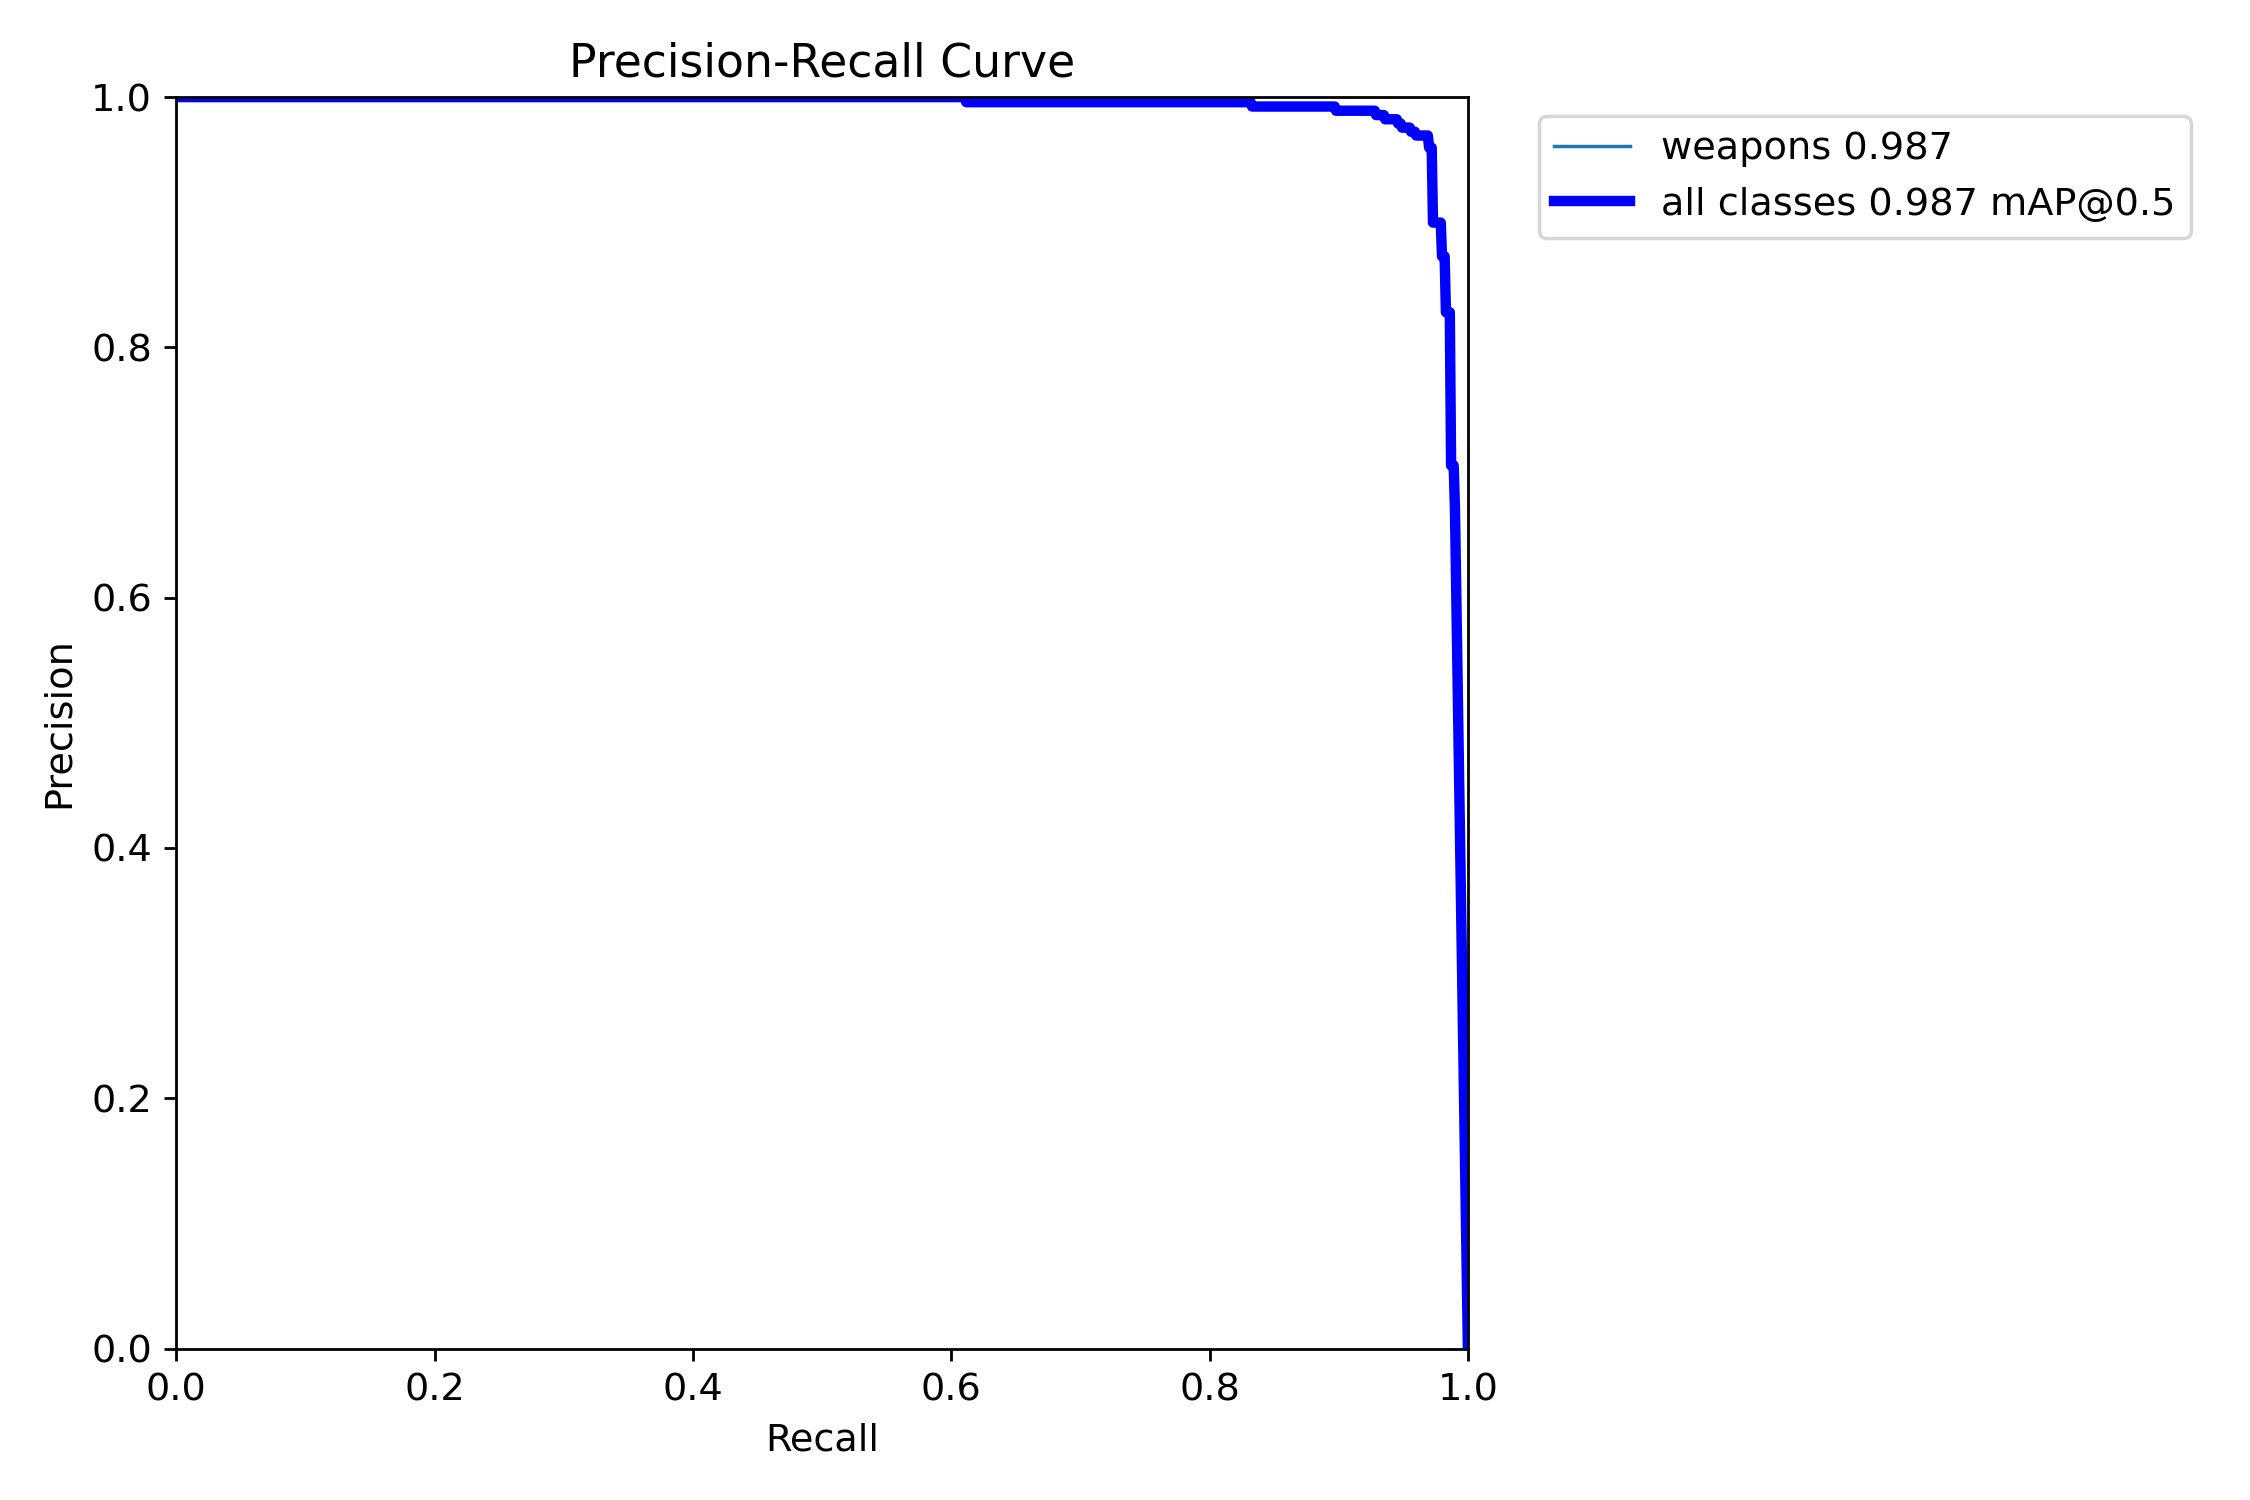

In [35]:
Image("/kaggle/working/runs/detect/train2/PR_curve.png", width=800)

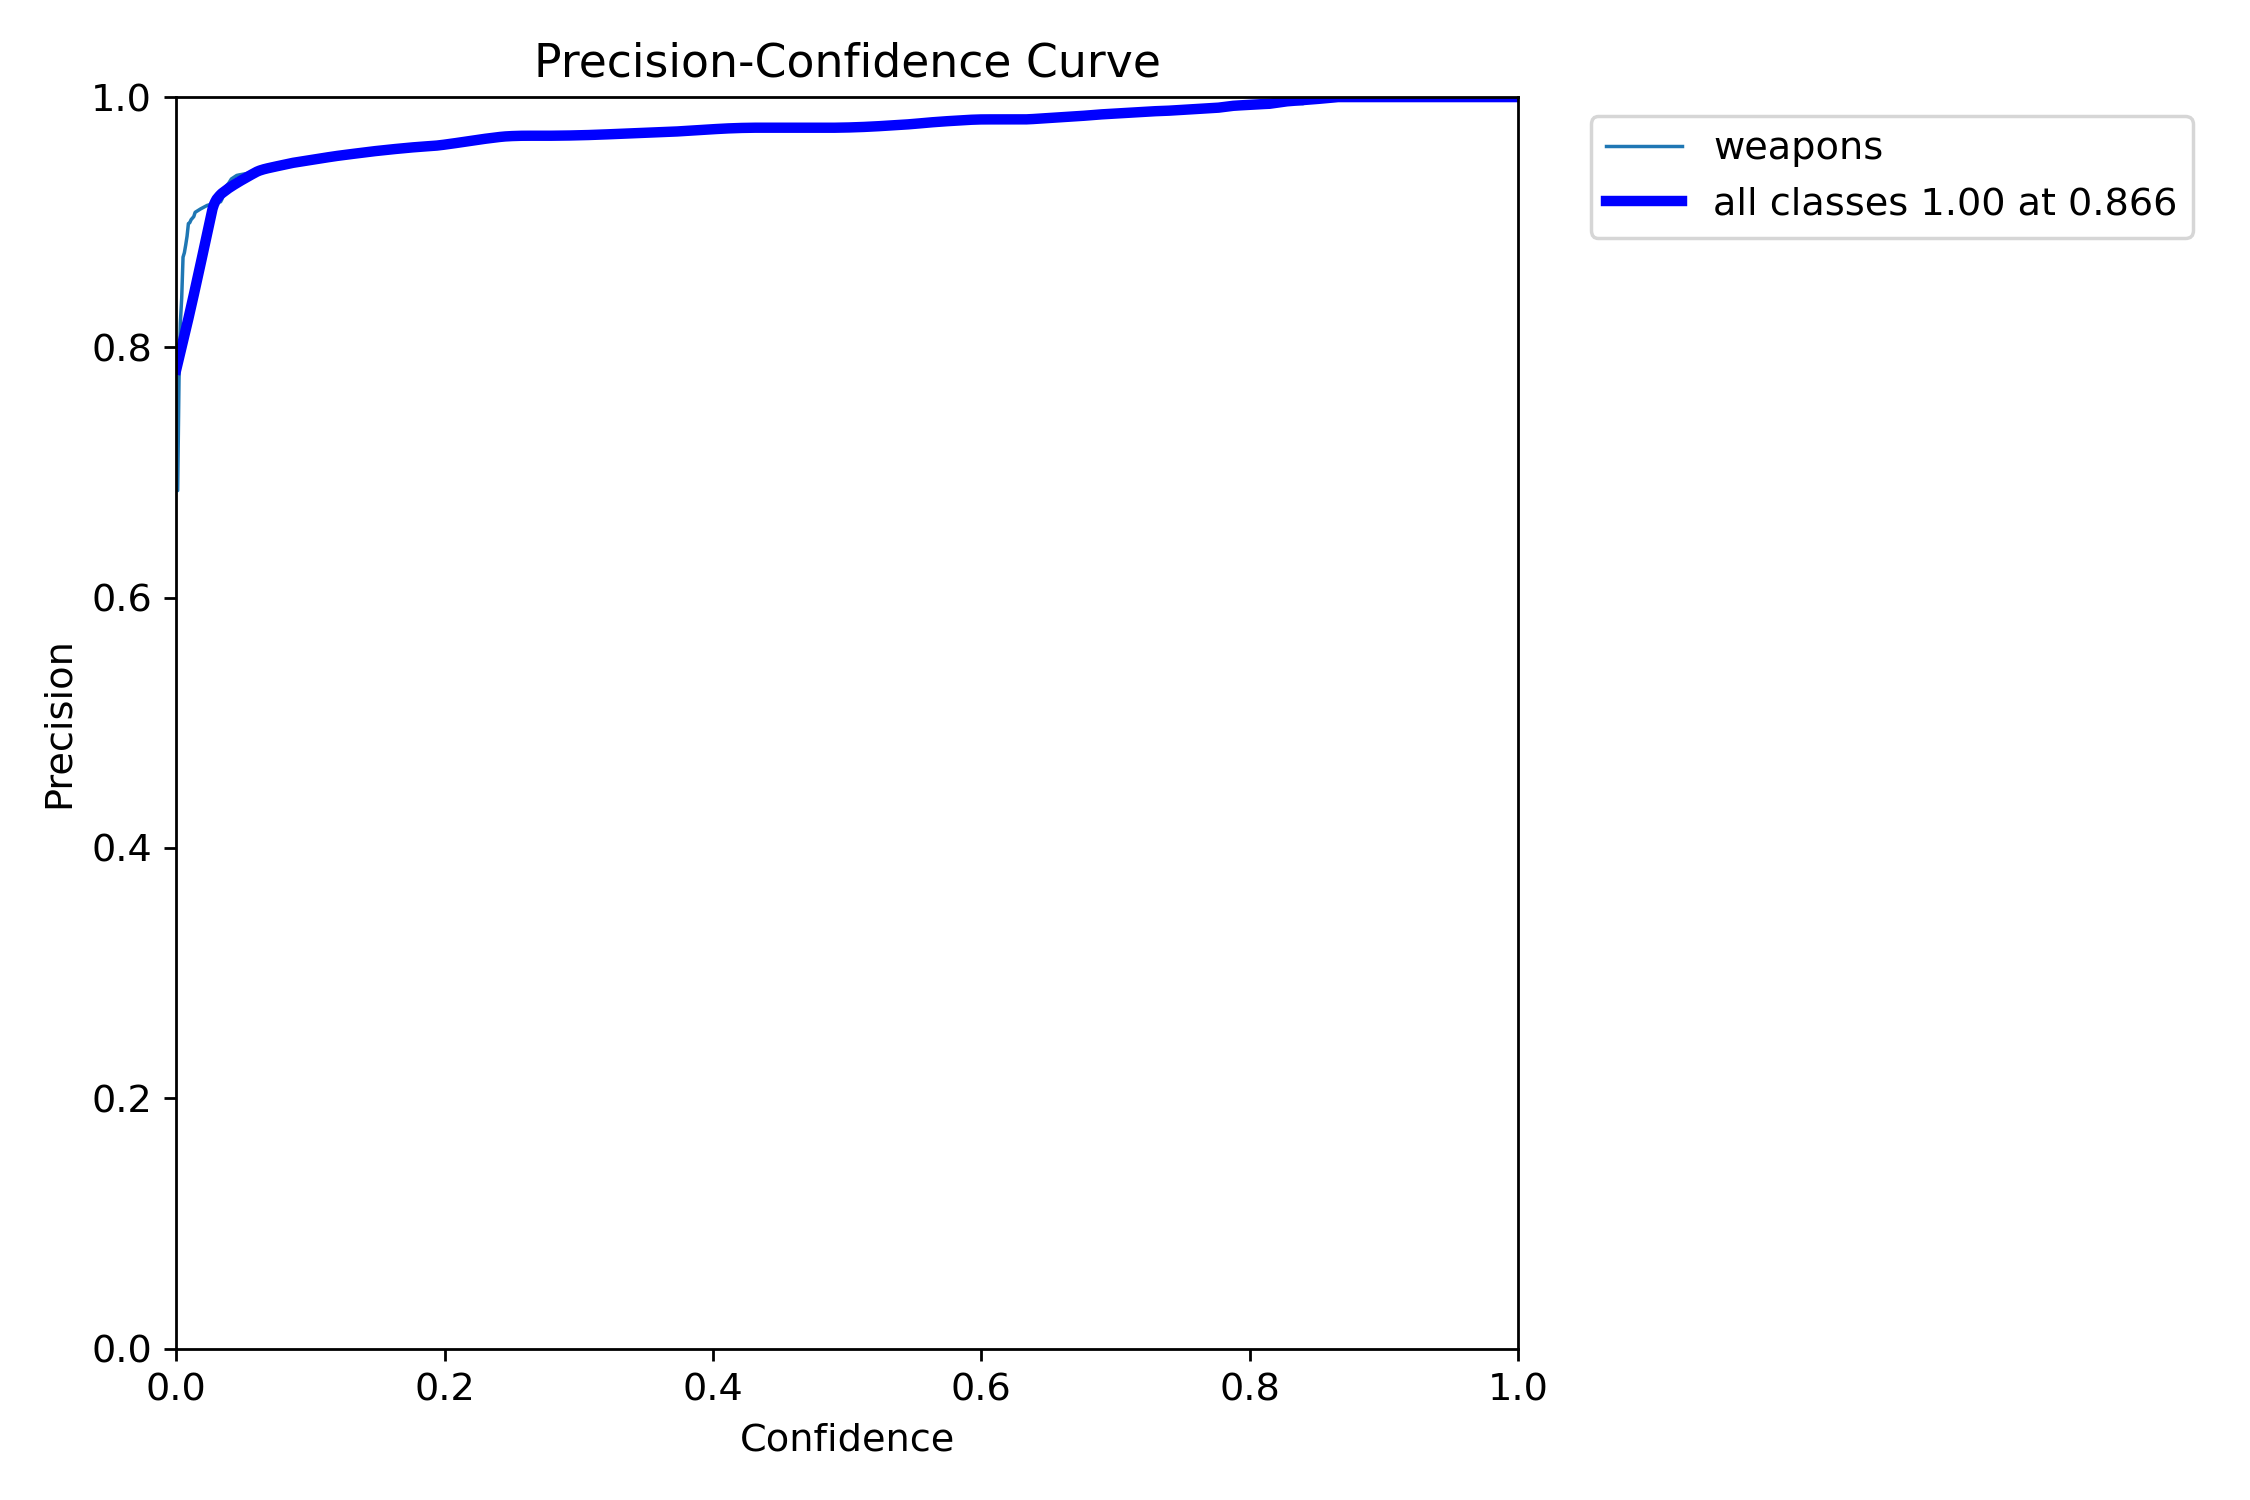

In [36]:
Image("/kaggle/working/runs/detect/train2/P_curve.png", width=800)

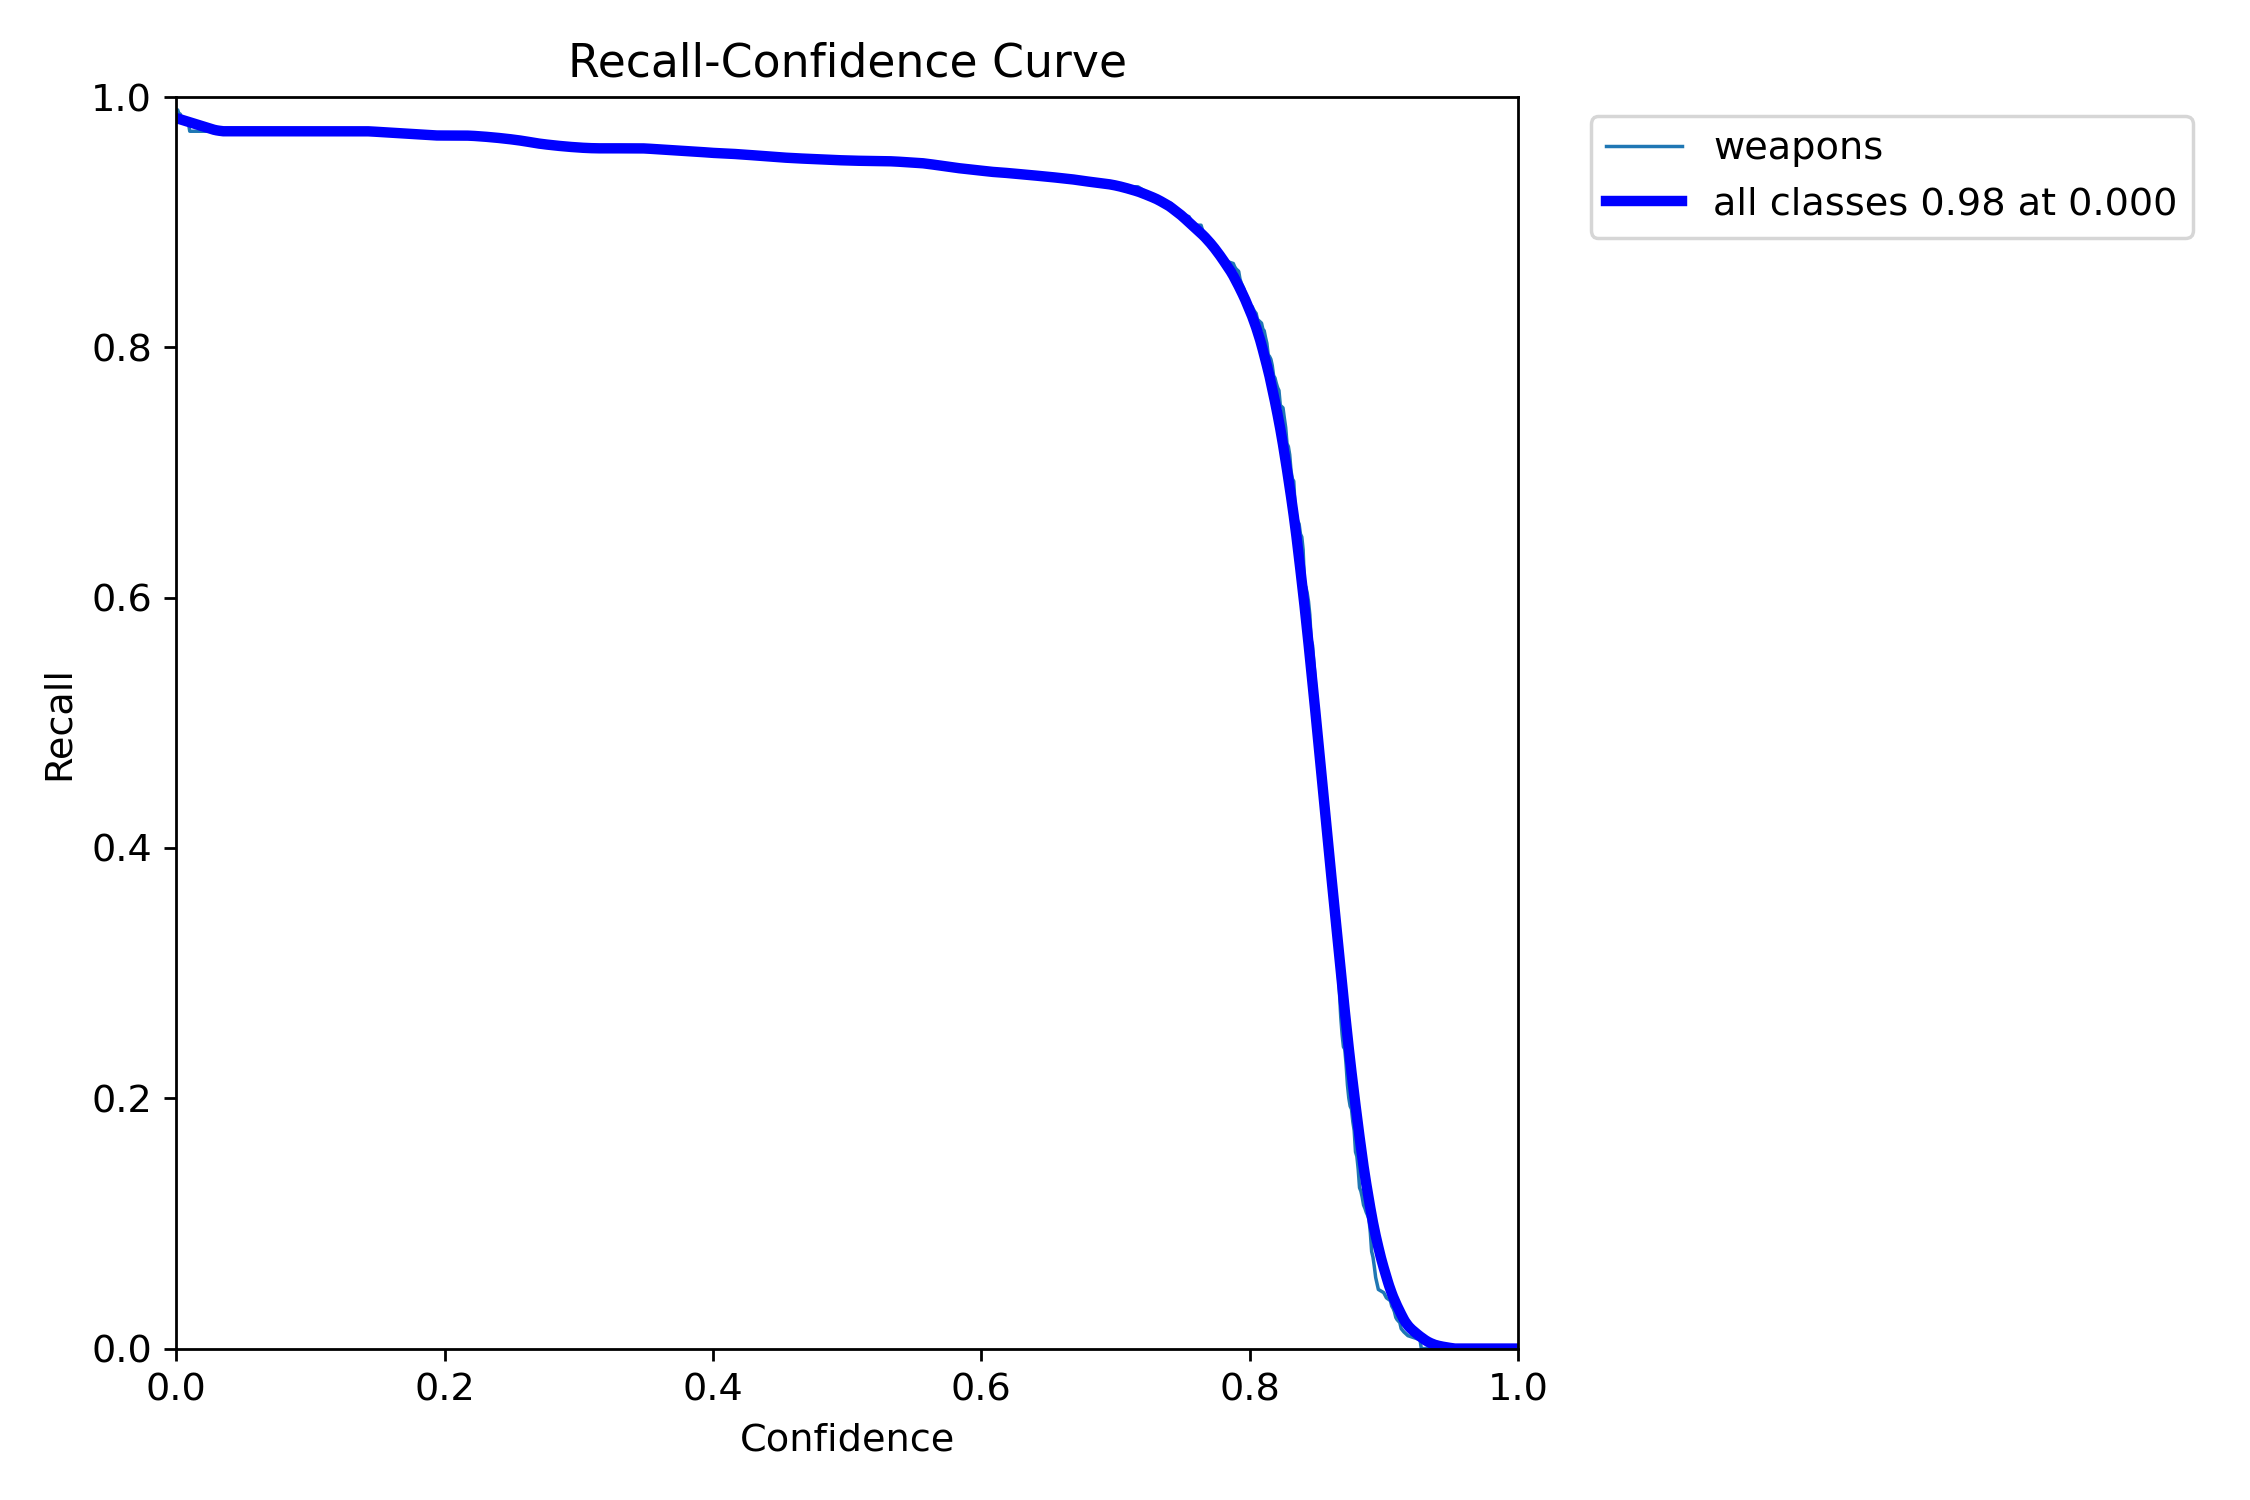

In [37]:
Image("/kaggle/working/runs/detect/train2/R_curve.png", width=800)

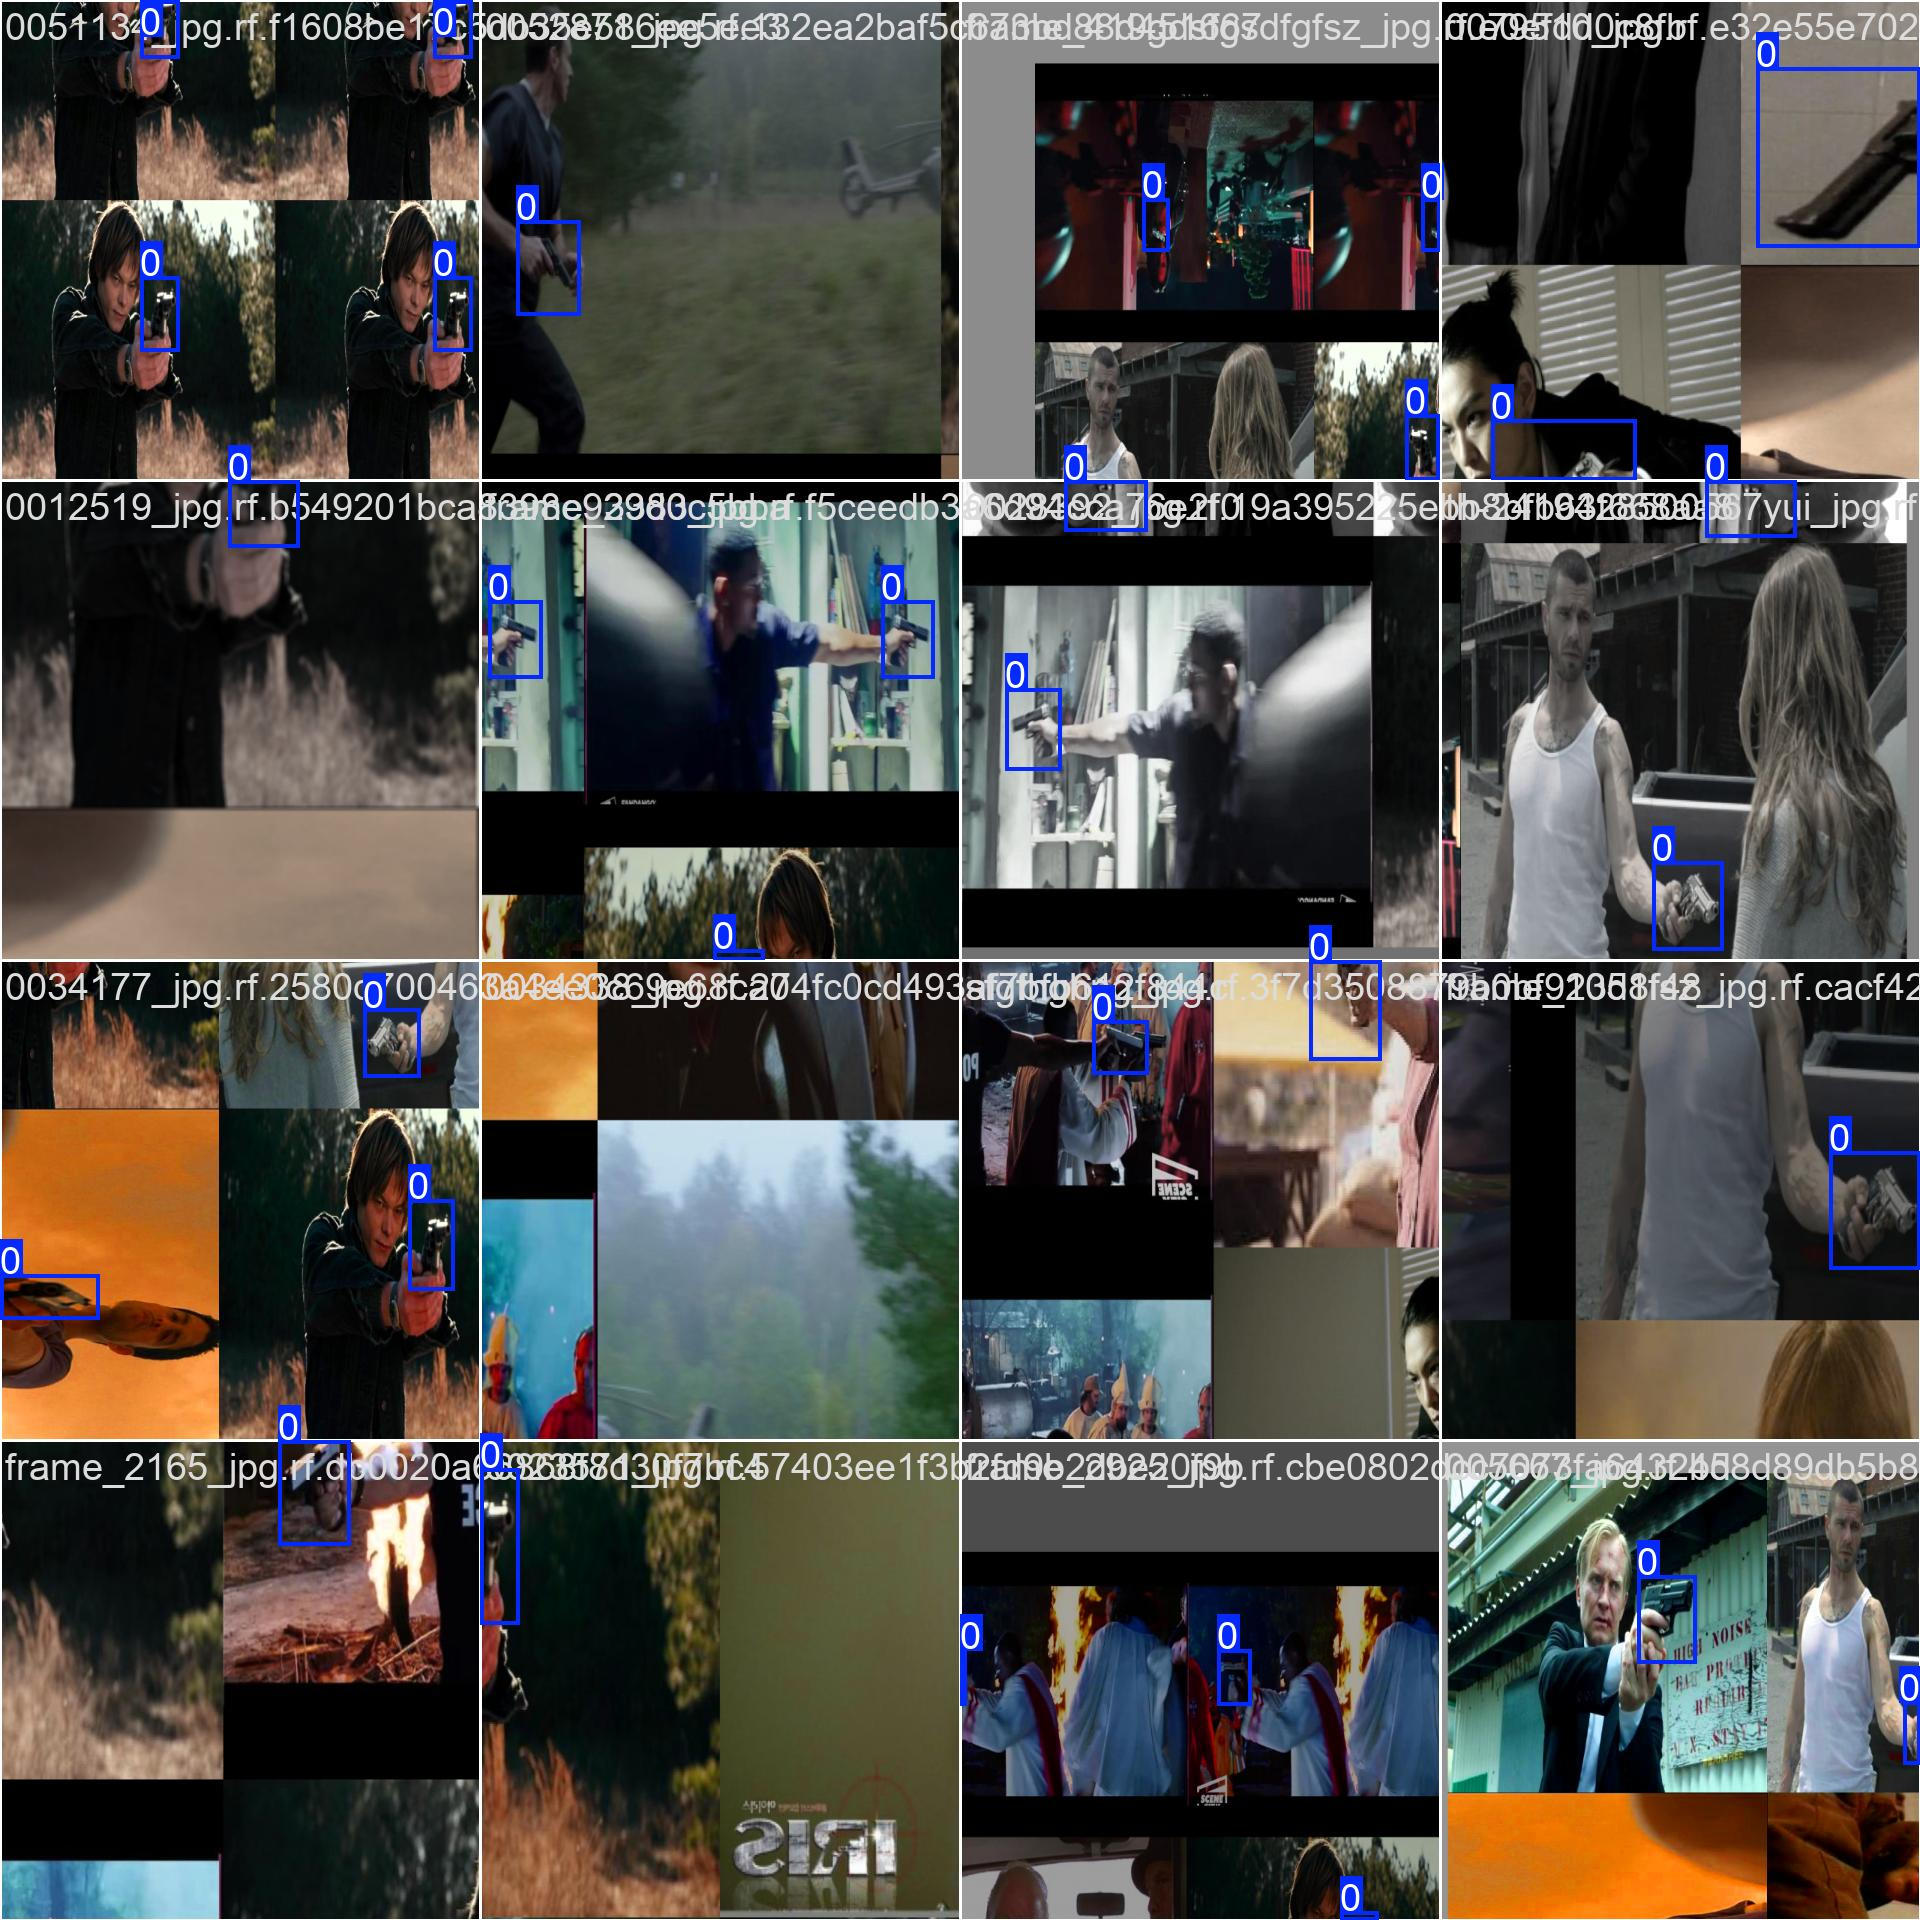

In [38]:
Image("/kaggle/working/runs/detect/train2/train_batch0.jpg", width=800)

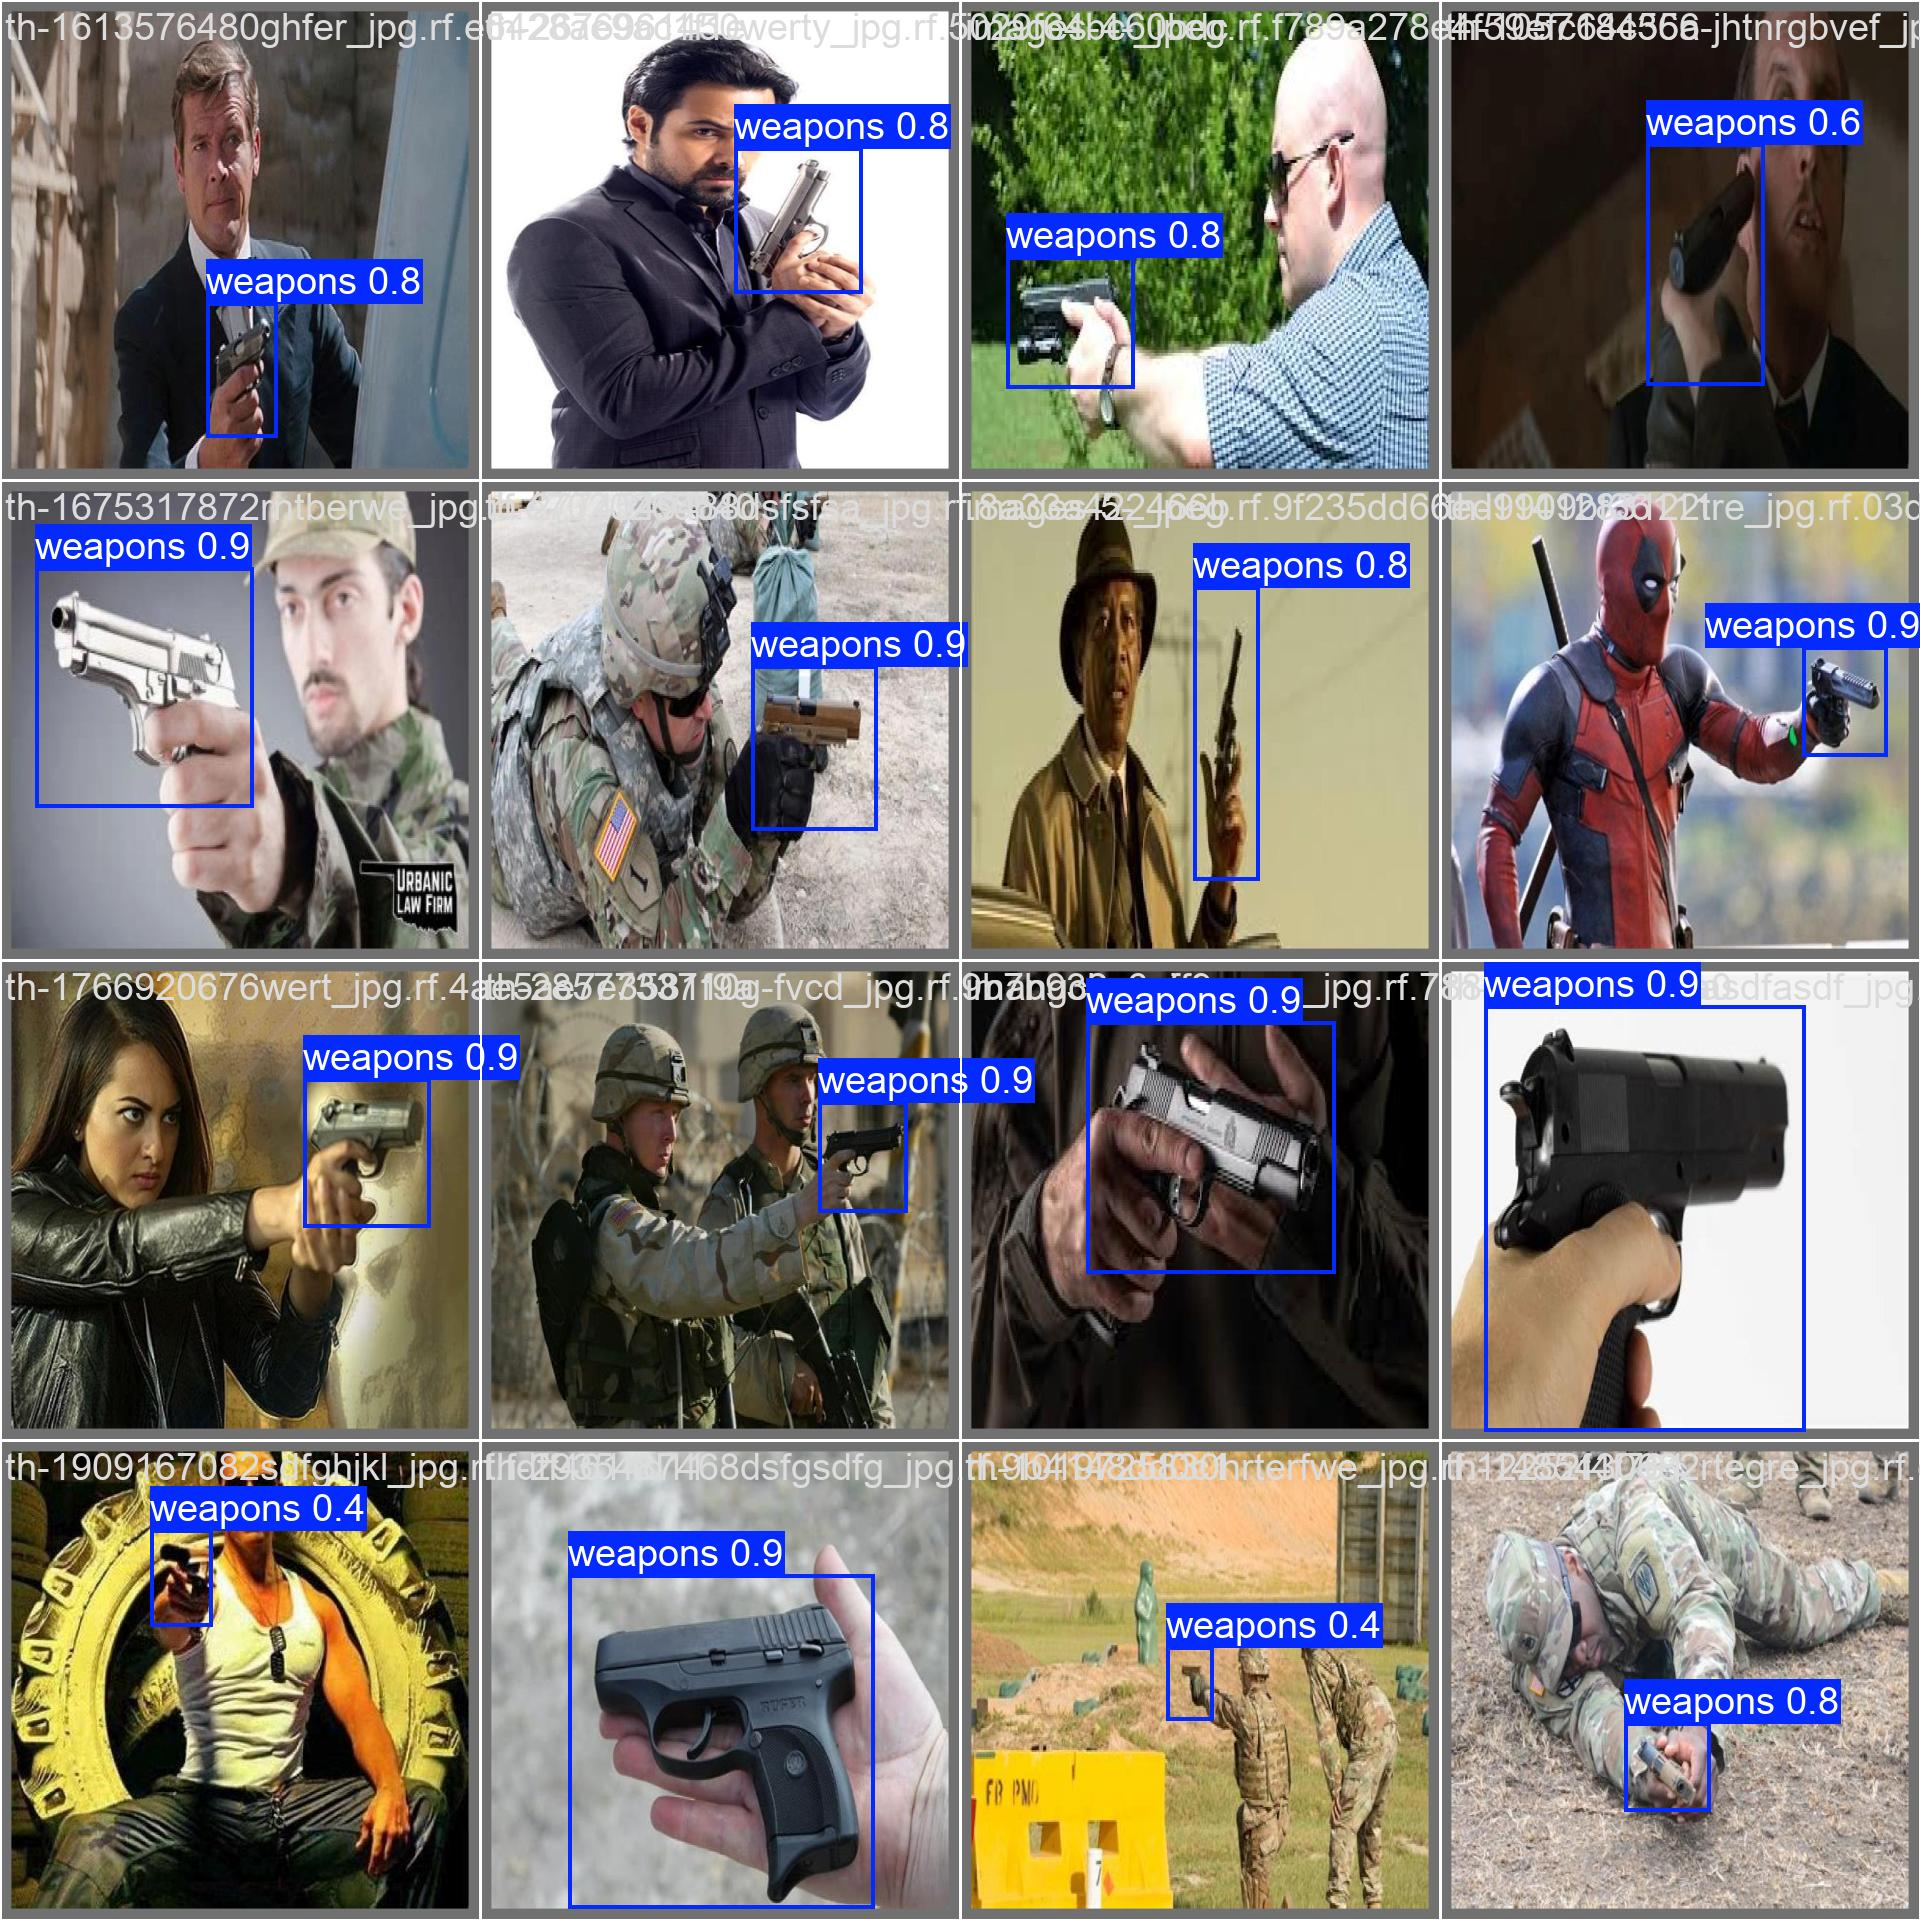

In [39]:
Image("/kaggle/working/runs/detect/train2/val_batch0_pred.jpg", width=800)

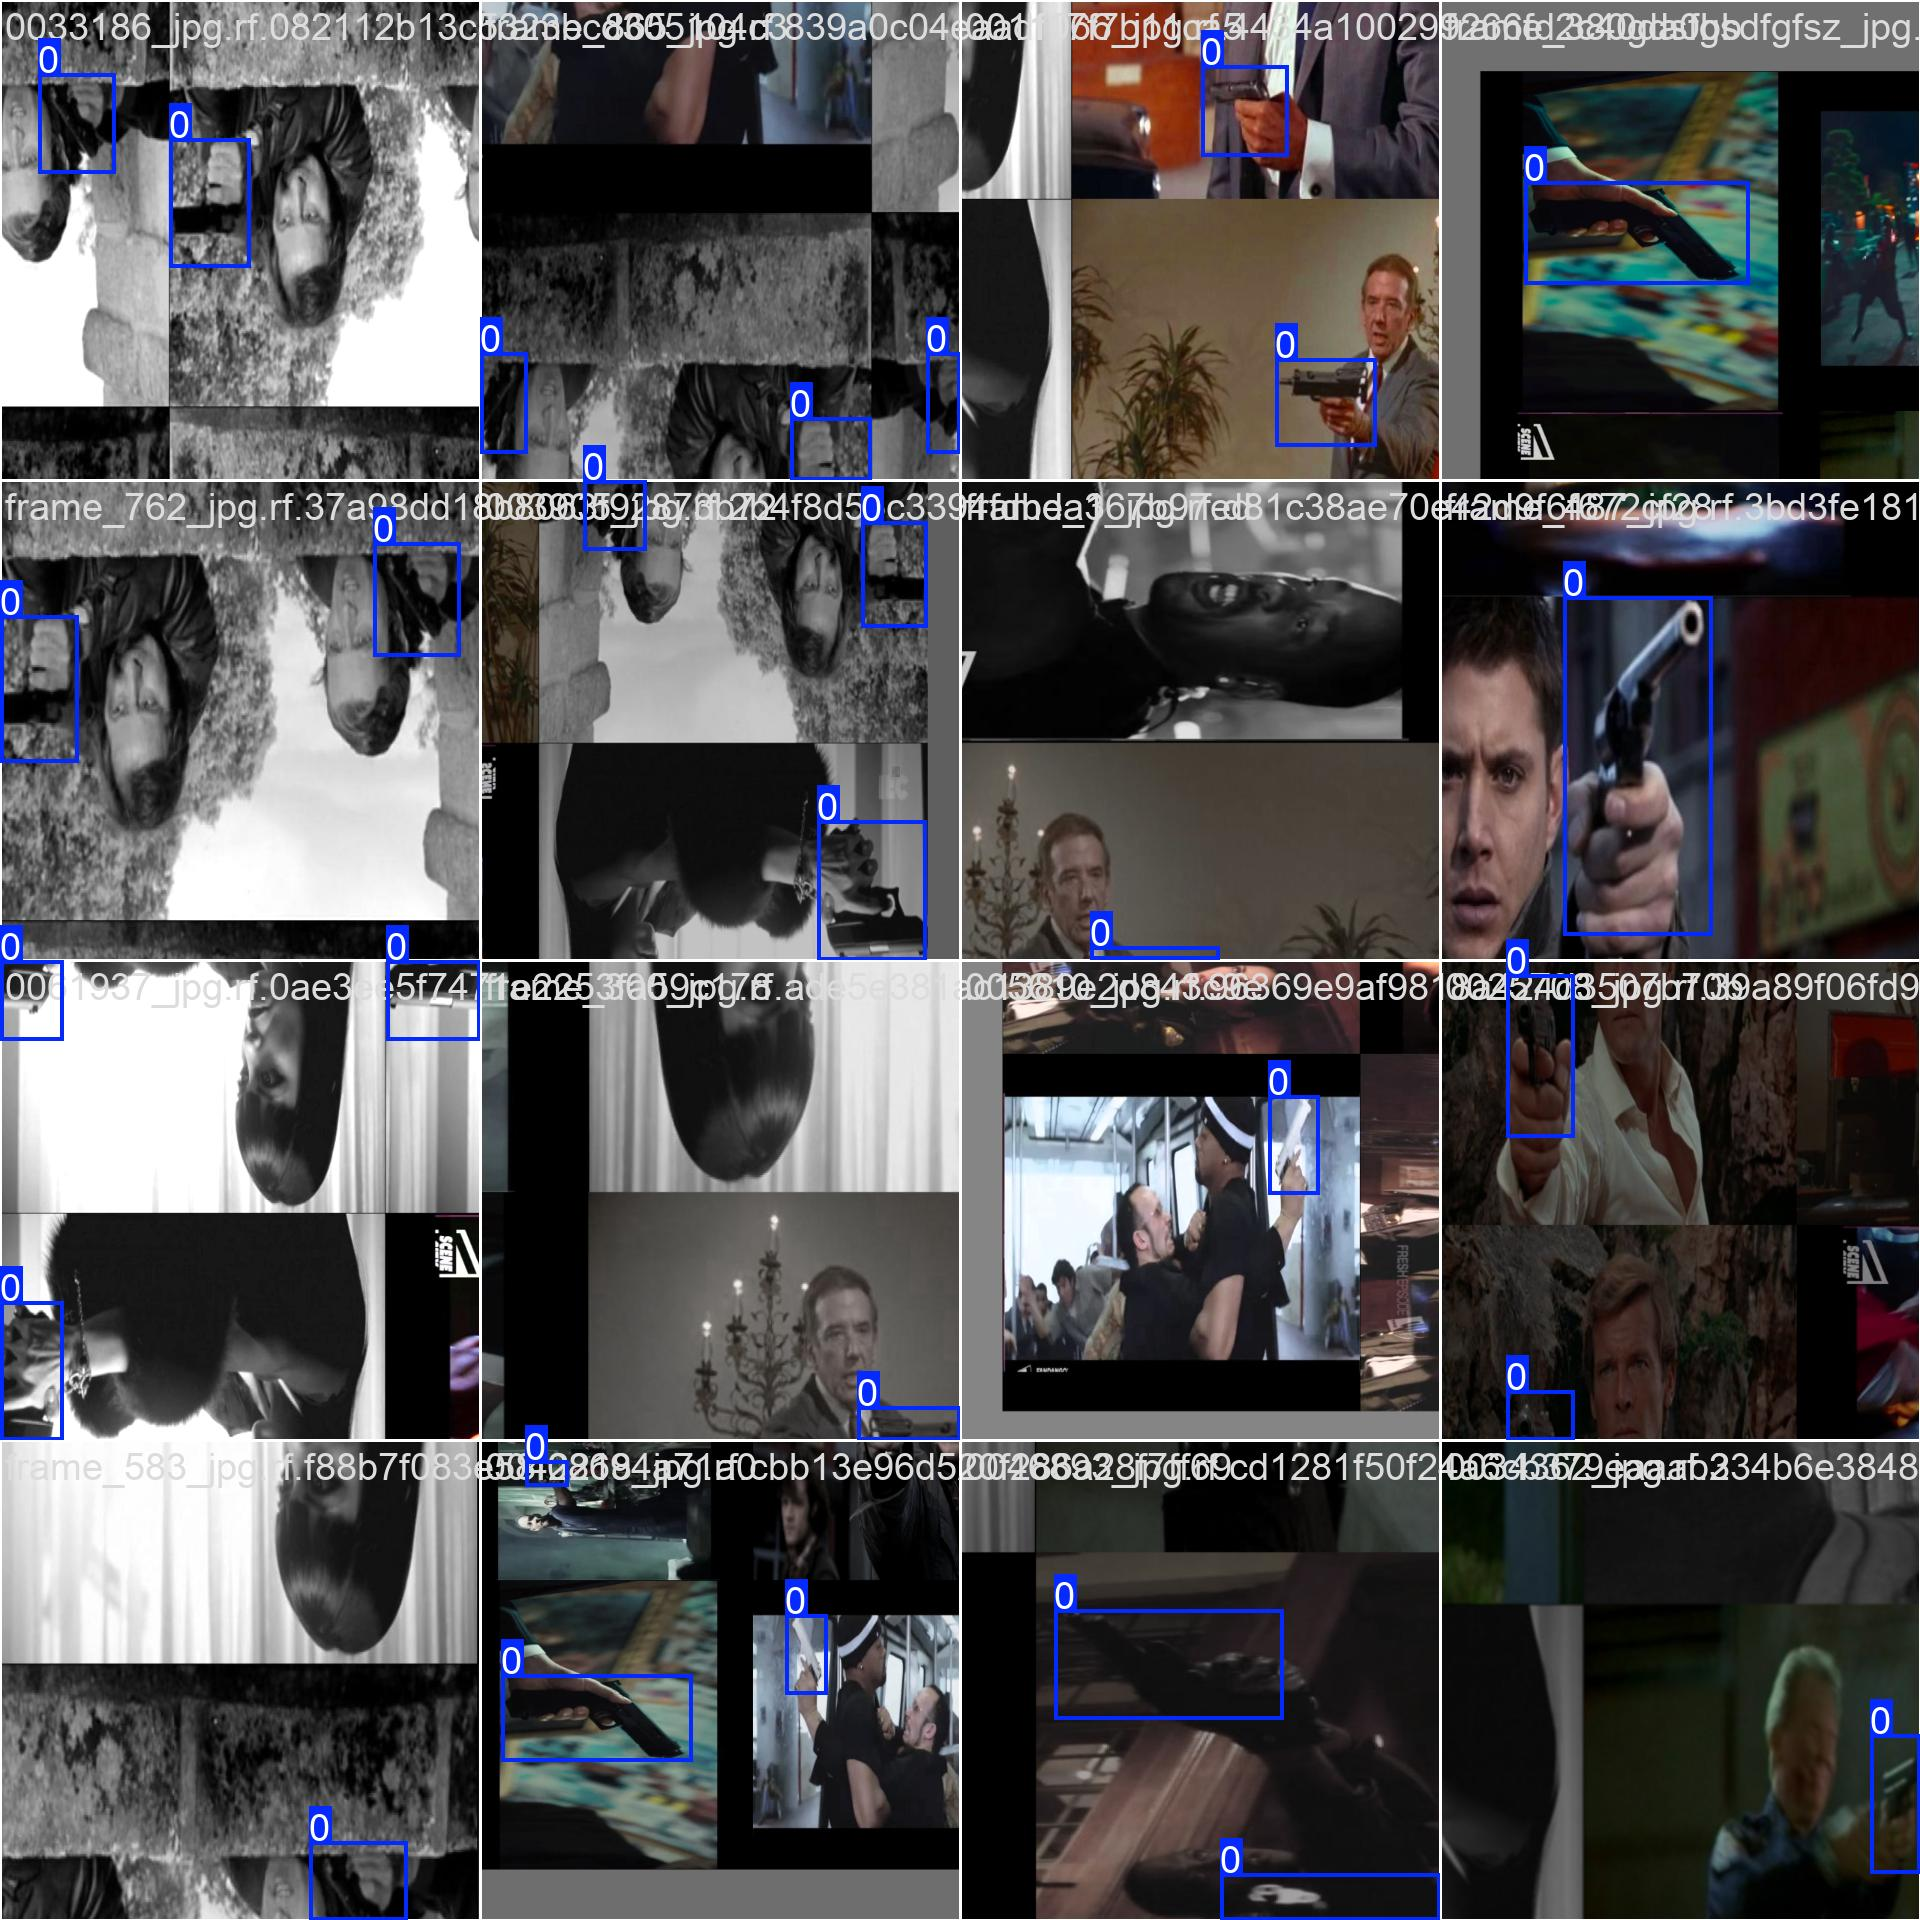

In [40]:
Image("/kaggle/working/runs/detect/train2/train_batch1.jpg", width=800)

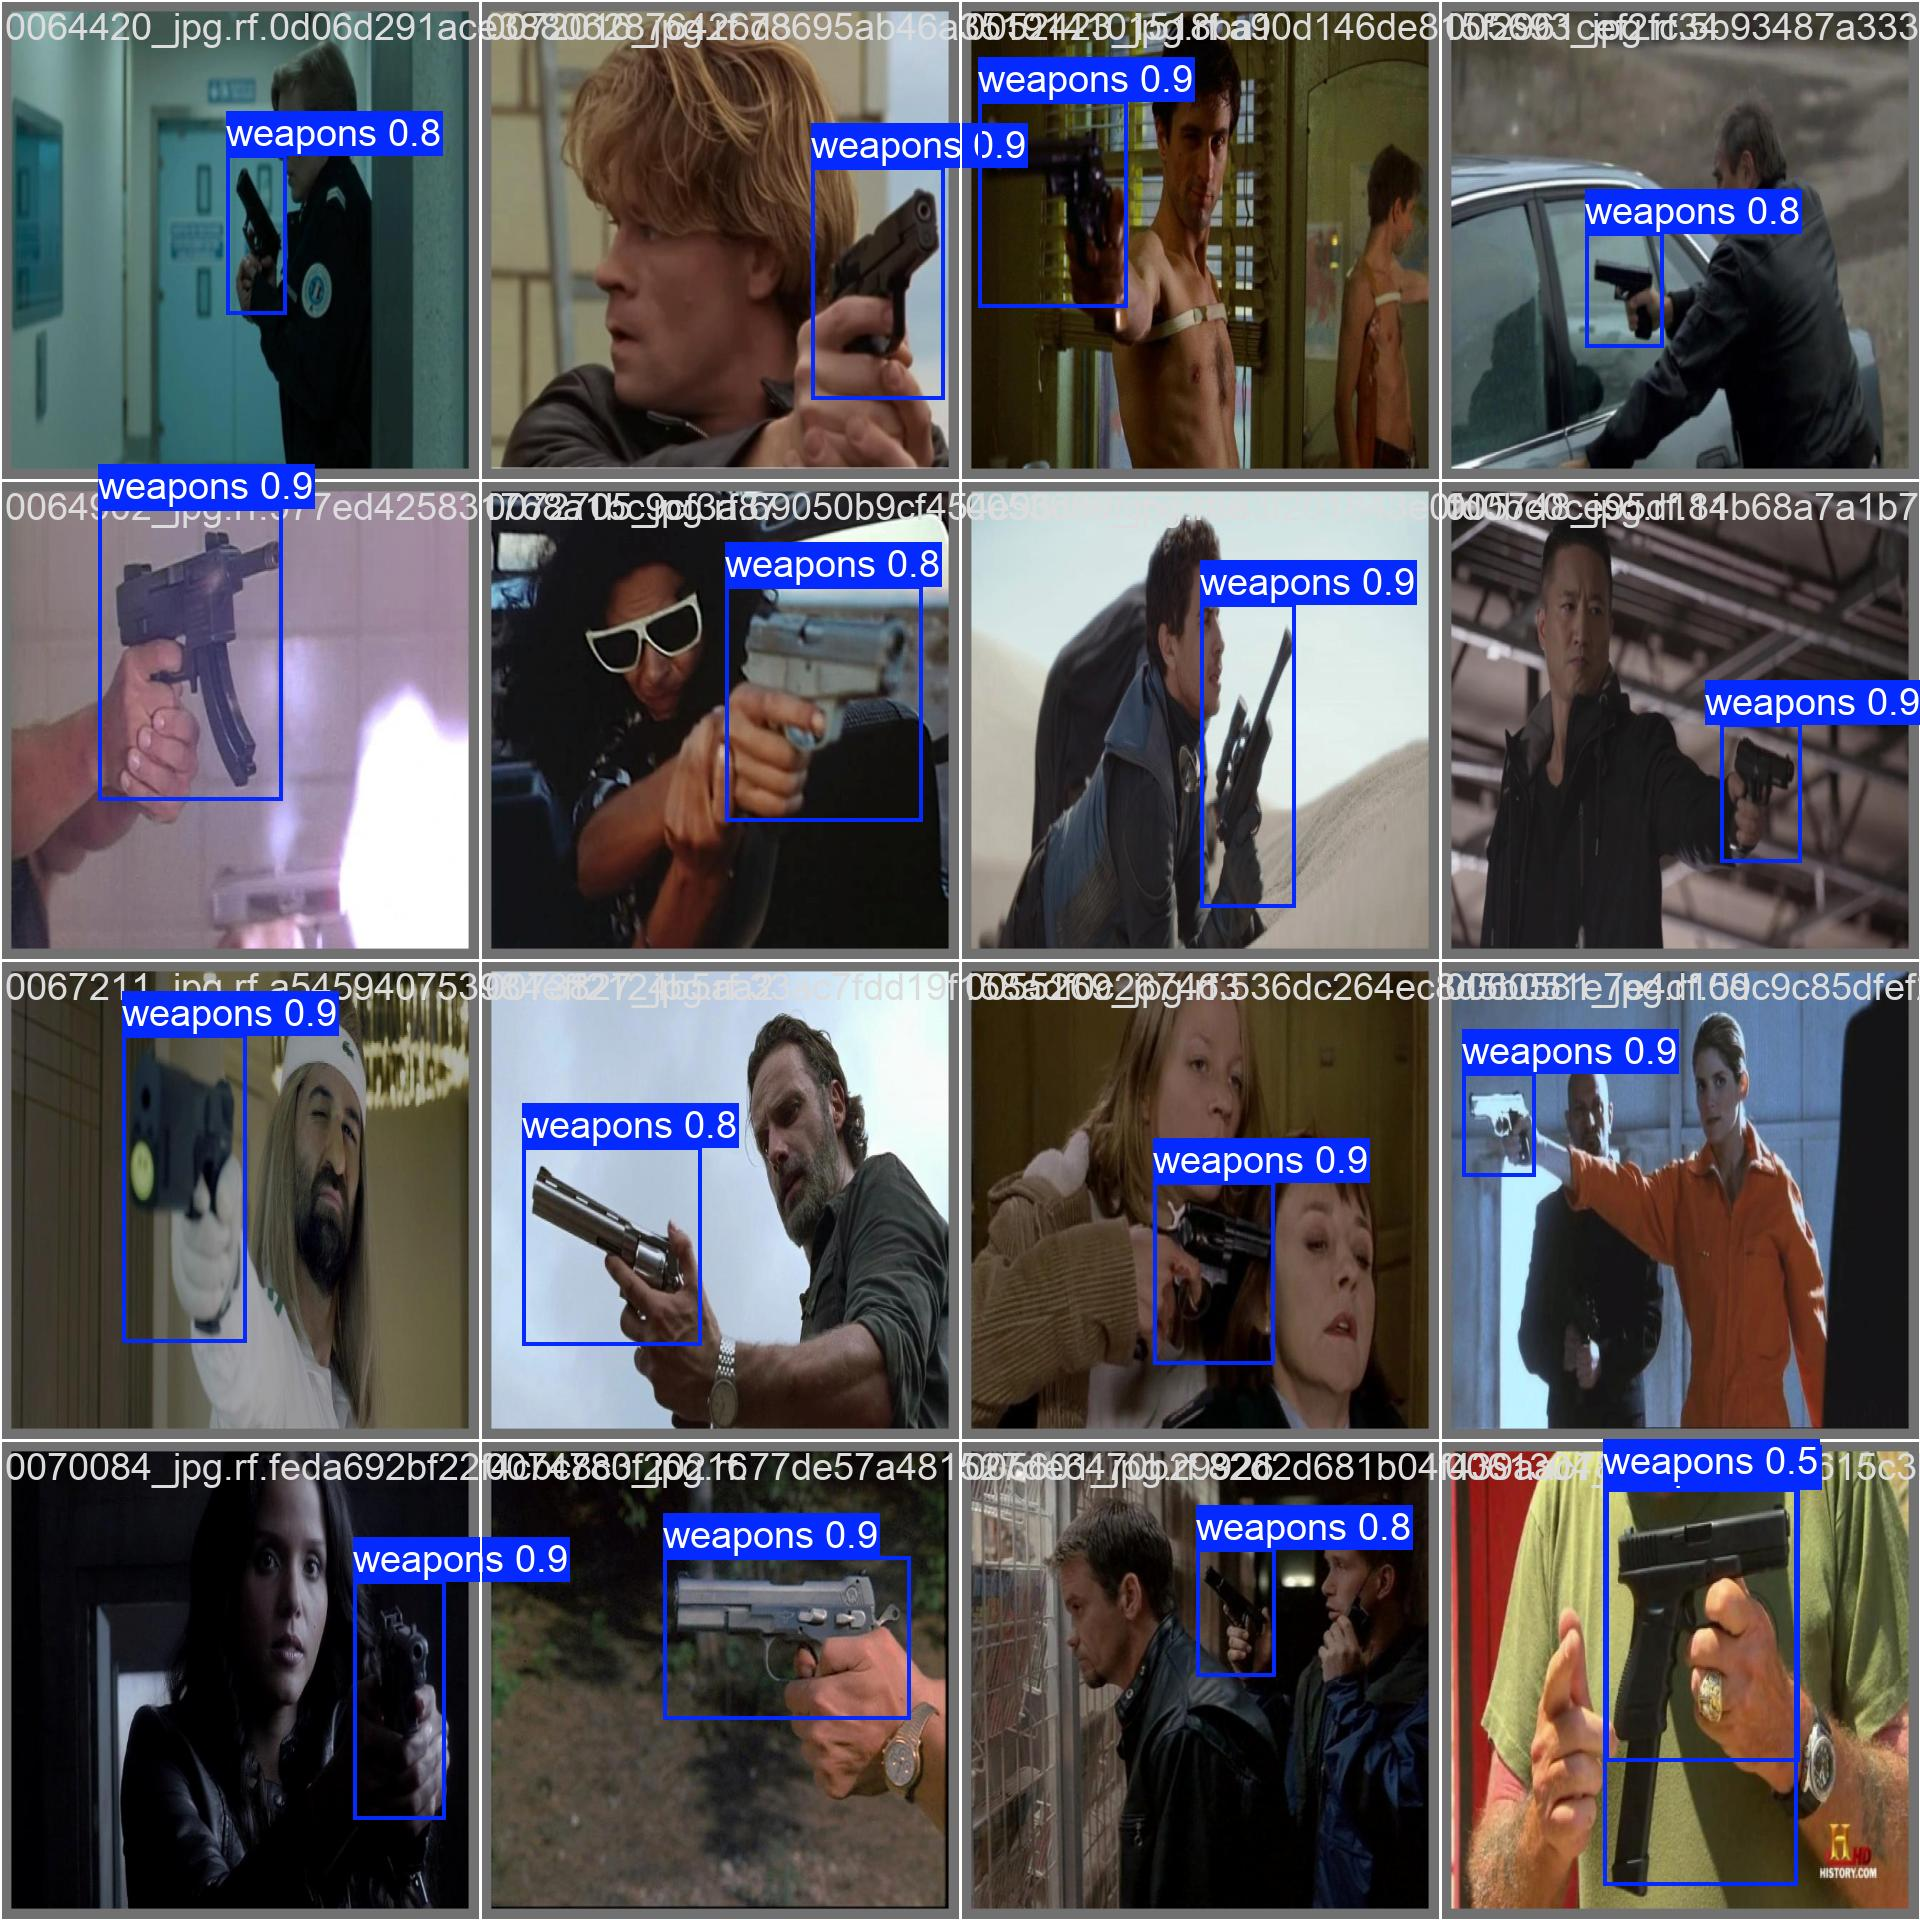

In [41]:
Image("/kaggle/working/runs/detect/train2/val_batch1_pred.jpg", width=800)

## **Running Validation on YOLOv11n: Two Approaches**
<div style="text-align: justify;"> 

In this section, we will explain two different ways of running the **YOLOv11n validation** process: one for running in a Kaggle notebook or Google Colab, and the other for running in local environments like VS Code or Jupyter Notebook. Both approaches are used to evaluate the model's performance on a validation dataset.

### **1. Running Validation in Kaggle or Google Colab**
```bash
!yolo task=detect mode=val model="/kaggle/working/runs/detect/train2/weights/best.pt" data={dataset.location}/data.yaml

```

### **2. Running Validation in VS Code or Jupyter Notebook**

```python
val_results = model.val(
    data=r"\kaggle\working\gun_detection\weapons_detection-9\data.yaml",
    imgsz=640,  # inference image size
    conf=0.001,  # confidence threshold
    iou=0.6,  # NMS IOU threshold
    save_json=True,  # save a COCO JSON results file
    save_txt=True,  # save results to *.txt
    save_conf=True,  # save confidences in --save-txt labels
    verbose=True,  # report mAP by class
)
```


### **Explanation**
<div style="text-align: justify;"> 

- **Kaggle/Colab Approach**: This uses the `!yolo` command, a shell command executed within Jupyter or Colab notebooks. It's great for quick experiments in cloud environments.
- **VS Code/Jupyter Approach**: In local setups, the `.val()` function is used for validation, offering more flexibility and options for saving results and adjusting validation parameters.


In [42]:
!yolo task=detect mode=val model="/kaggle/working/runs/detect/train2/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.39 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /kaggle/working/weapons_detection-9/valid/labels.cache... 273 imag
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        273        293      0.969      0.969      0.987      0.659
Speed: 1.3ms preprocess, 2.9ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## **Running Predictions on YOLOv11n: Two Approaches**
<div style="text-align: justify;"> 

This section explains two different ways to perform predictions using a **YOLOv11n** model: one for running in a **Kaggle notebook** or **Google Colab**, and the other for running in **VS Code** or **Jupyter Notebook**. Both approaches are used to make predictions (inference) on a test dataset after training the model.

### **1. Running Predictions in Kaggle or Google Colab**

```bash
!yolo task=detect mode=predict model="/kaggle/working/runs/detect/train2/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True
```

### **2. Running Predictions in VS Code or Jupyter Notebook**
```python
model = YOLO("/kaggle/working/runs/detect/train2/weights/best.pt")
results = model.predict(
    source=f"{dataset.location}/test/images",  # Path to the test images
    conf=0.25,  # Confidence threshold for predictions
    save=True    # Save prediction results
)
```

### **Explanation**
<div style="text-align: justify;"> 

- **Kaggle/Colab Approach**: Uses the `!yolo` command to perform predictions directly within a notebook. It is an efficient method for cloud environments, where everything is often set up to run with minimal configuration.
- **VS Code/Jupyter Approach**: Loads the model in Python using `YOLO()` and then calls the `.predict()` method to perform inference. This method provides more control over the code and is suited to local development environments.

In [43]:
!yolo task=detect mode=predict model="/kaggle/working/runs/detect/train2/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.39 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/149 /kaggle/working/weapons_detection-9/test/images/0016057_jpg.rf.3e39b95b468bf94ce712854e7856700b.jpg: 640x640 1 weapons, 10.4ms
image 2/149 /kaggle/working/weapons_detection-9/test/images/001947_jpg.rf.d3eb637088646d5fd7d22ab609911dae.jpg: 640x640 1 weapons, 8.9ms
image 3/149 /kaggle/working/weapons_detection-9/test/images/0021865_jpg.rf.c25e0507a36ef0c5ab5863b6feb159b2.jpg: 640x640 1 weapons, 7.7ms
image 4/149 /kaggle/working/weapons_detection-9/test/images/0022572_jpg.rf.2c13b0bf2290e3eec03b41b79e7ff2c7.jpg: 640x640 1 weapons, 7.4ms
image 5/149 /kaggle/working/weapons_detection-9/test/images/0028706_jpg.rf.eab0765aed46107840382c6dcc55d505.jpg: 640x640 1 weapons, 7.3ms
image 6/149 /kaggle/working/weapons_detection-9/test/images/004608_jpg.rf.83b7a1e13b4f9c46d74ab346bad8cad2.jpg: 640x640 1 weapons, 7.9ms
i

## **Displaying Predicted Images**
<div style="text-align: justify;"> 

In this section, we are selecting and displaying a few images from the latest prediction folder generated after running the object detection task. This is done in a Kaggle/Colab environment, where the results from YOLOv11n are saved and stored in a specific directory.

### **Code Explanation**

```python
latest_folder = max(glob.glob('/kaggle/working/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:6]:
    display(IPyImage(filename=img, width=600))
    print("\n")
```

### **Explanation**
<div style="text-align: justify;"> 

- The code starts by identifying the most recent folder containing prediction results, then it selects and displays a sample of images from that folder.
- The use of `glob` is essential for searching through directories and files, while `IPyImage` is used to display images within the notebook interface.

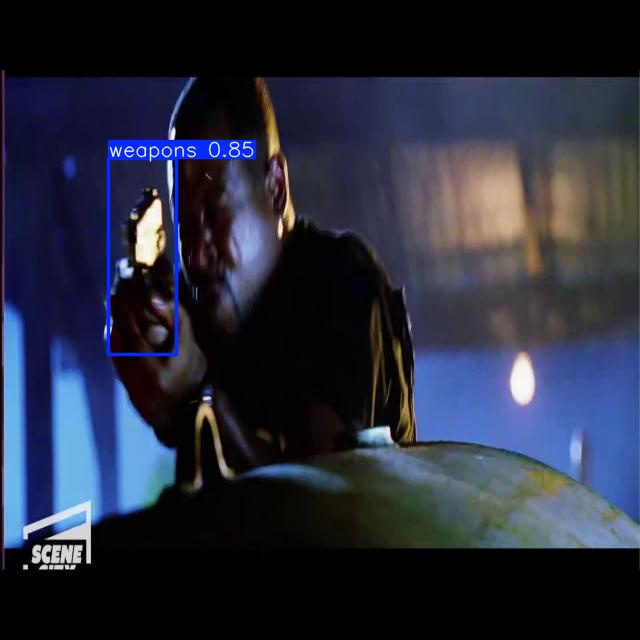

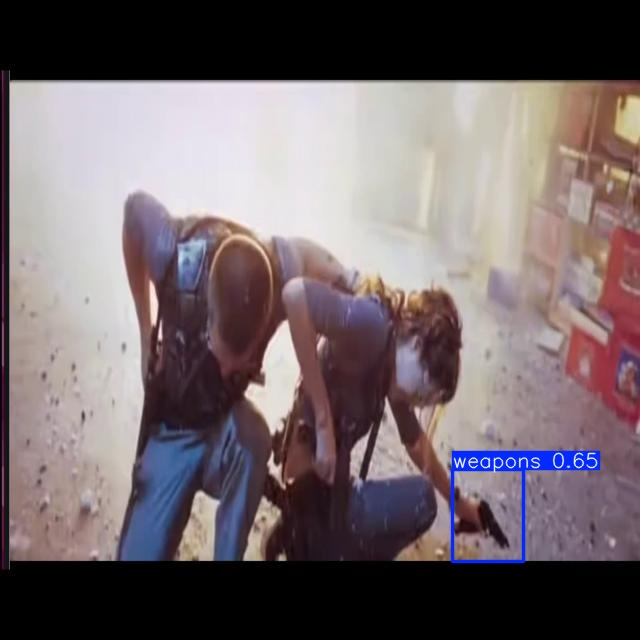

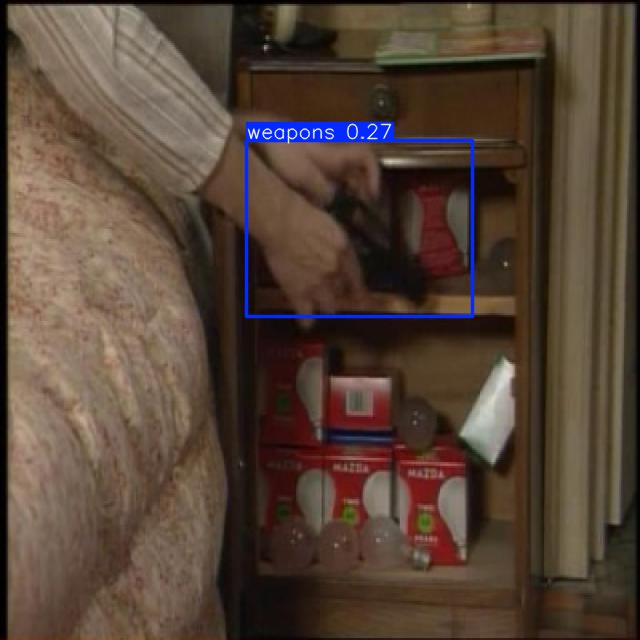

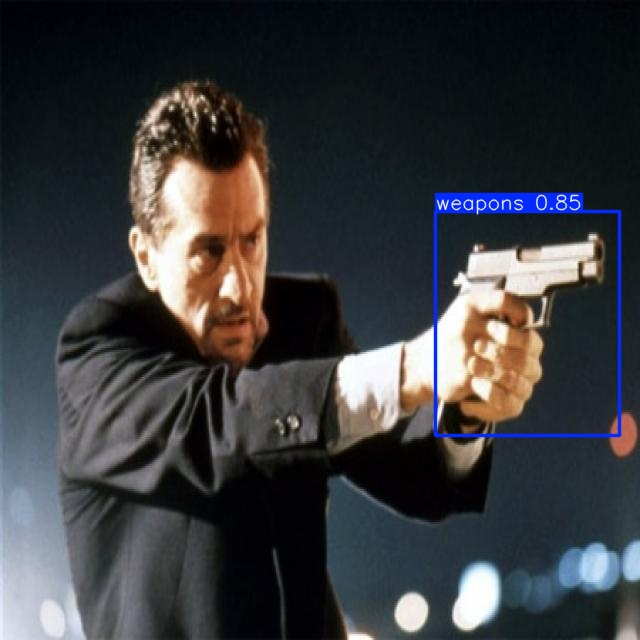

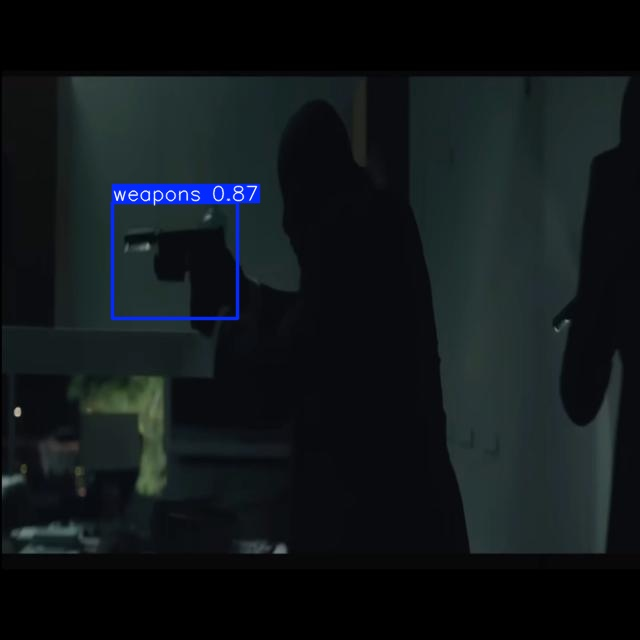

In [ ]:
latest_folder = max(glob.glob('/kaggle/working/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:6]:
    display(IPyImage(filename=img, width=600))
    print("\n")

## **Conclusion**
<div style="text-align: justify;"> 

### **Model Summary**
- **Architecture**: YOLOv11n (fused)
- **Number of Layers**: 238
- **Parameters**: 2,582,347
- **Gradients**: 0 (This indicates that no gradients were required during inference.)
- **Computational Complexity**: 6.3 GFLOPs (Billion Floating-Point Operations)

### **Evaluation Results**
- **Validation Dataset**: The model was evaluated on a validation set of 273 images.
- **Performance Metrics**:
  - **Precision (P)**: 0.969
  - **Recall (R)**: 0.969
  - **mAP@50**: 0.987
  - **mAP@50-95**: 0.659 (This metric indicates the mean Average Precision averaged across different IoU thresholds, demonstrating a balanced performance.)

These metrics suggest that the YOLOv11n model performs exceptionally well on the weapons detection task, with high precision and recall, indicating that the model is both accurate and reliable in detecting relevant objects. The high **mAP@50** value (0.987) suggests that the model is very effective at detecting objects with a 50% IoU threshold. 

### **Speed Performance**
- **Preprocessing**: 1.3ms per image
- **Inference**: 2.9ms per image
- **Loss Calculation**: 0.0ms (This is typical for inference, where no training-related operations like loss computation are needed.)
- **Postprocessing**: 1.6ms per image

Overall, the inference speed is highly efficient, with a total processing time of approximately **6.8ms per image**, which ensures real-time performance on most hardware setups. The **YOLOv11n** model demonstrates outstanding performance in terms of both **accuracy** and **speed**. With a **high mAP** value and **balanced precision and recall**, the model is highly effective for **weapons detection**. The model's **speed** is optimal for real-time applications, making it suitable for deployment in various environments, including edge devices. In conclusion, YOLOv11n proves to be a highly capable and efficient solution for detecting weapons in images, providing a solid foundation for real-world applications where both accuracy and speed are critical.

# **Reference List**

Mike (2023) ‘weapons_detection Dataset’, *Roboflow Universe* [Preprint]. Roboflow. Available at: [https://universe.roboflow.com/mike-ovbzu/weapons_detection-tsdac.](https://universe.roboflow.com/mike-ovbzu/weapons_detection-tsdac.)